# **Telco Customer Churn**

<hr>

# ***1. Business Understanding***

**1.1** ***Context :***

Pada saat ini, industri telekomunikasi telah berkembang pesat. Banyak sekali perusahaan telekomunikasi yang berkompetisi menawarkan jasanya menggunakan sistem berlangganan untuk menjual jasanya, sehingga persaingan antar perusahaan semakin ketat. Salah satu tantangan yang kini dihadapi perusahaan adalah usaha untuk menurunkan jumlah pelanggan yang berhenti menggunakan layanan perusahaan dan beralih ke perusahaan kompetitor.

Suatu perusahaan ingin mengetahui pelanggan yang bagaimana yang akan pindah (*churn*) dari perusahaan tersebut sehingga jumlah pelanggan yang beralih (*churn*) dapat dikurangi. Seorang Data Scientist diminta untuk membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti menggunakan layanan (*churn*) atau tidak dengan menggunakan machine learning. 

Target :

0 : Tidak berhenti menggunakan layanan

1 : Berhenti menggunakan layanan (*churn*)

**1.2** ***Problem Statement :***

Pada suatu perusahaan telekomunikasi, tingginya persentase pelanggan yang melakukan *churn* menjadi salah satu indikator tingkat kegagalan suatu perusahaan telekomunikasi, sehingga diperlukan upaya untuk mengurangi persentase pelanggan *churn* tersebut. Pada umumnya perusahaan lebih memilih untuk mempertahankan pelanggan, karena biaya untuk mempertahankan pelanggan (*customer retention cost*) lebih rendah daripada memperoleh pelanggan baru (*customer acquisition cost*). Memperoleh pelanggan baru  dapat menghabiskan biaya **lima kali lebih besar** daripada mempertahakan pelanggan [(sumber 1)](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs) [(sumber 2)](https://www.linkedin.com/pulse/customer-retention-vs-acquisition-which-one-choose-myfundbox/). Sedangkan biaya untuk memperoleh pelanggan baru adalah sebesar $315 [(sumber 1)](https://salesworks.asia/media-centre/blog/customer-acquisition-cost-in-southeast-asia-whats-a-good-benchmark/) [(sumber 2)](https://startuptalky.com/cac-by-industry/).

Salah satu cara perusahaan telekomunikasi mempertahankan pelanggannya agar tidak *churn*, yaitu dengan memberikan insentif retensi terhadap pelanggan. Insentif retensi yang dimaksud adalah dengan memberikan suku bunga yang menarik, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan pelanggan. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan mengurangi potensi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti menggunakan layanan.

**1.3** ***Goals :***

Berdasarkan permasalahan di atas, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan berhenti menggunakan layanan (*churn*) atau tidak, sehingga perusahaan dapat memfokuskan upaya retensi(mempertahankan pelanggan) pada pelanggan yang terindikasi untuk *churn*.
Selain itu, perusahaan ingin mengetahui faktor yang cenderung memperngaruhi pelanggan bertahan, sehingga mereka dapat membuat program bisnis yang tepat sasaran untuk mengurangi jumlah nasabah yang berhenti berlangganan (*churn*).

**1.4** ***Analytic Approach :***

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan berhenti menggunakan layanan (*churn*) atau tidak.

Kemudian akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang nasabah akan berhenti menggunakan layanan (*churn*) atau tidak.

**1.5** ***Metric Evaluation :***

Fokus utama dalam masalah ini pelanggan yang akan berhenti menggunakan layanan, maka target yang ditetapkan yaitu :
Target :
- 0 : Tidak berhenti menggunakan layanan
- 1 : Berhenti menggunakan layanan (*churn*)

Type 1 error : *False Positive* (pelanggan yang aktualnya tidak *churn* tetapi diprediksi *churn*)
Konsekuensi : tidak efektif dalam pemberian insentif

Type 2 error : *False Negative* (pelanggan yang aktualnya *churn* tetapi diprediksi tidak tidak akan *churn*)
Konsekuensi : kehilangan pelanggan

Berdasarkan konsekuensi yang ada, akan diberikan gambaran konsekuensi secara kuantitatif, maka akan dicoba perhitungan untuk mengatahui dampak biaya berdasarkan asumsi berikut :
- Tidak efektif dalam pemberian insentif retensi --> menyia-nyiakan biaya CRC (sebesar 0.2 kali biaya CAC) yaitu sebesar $63.
- Kehilangan pelanggan --> mengeluarkan biaya CAC (sebesar lima kali biaya CRC) yaitu sebesar $315.

Berdasarkan informasi yang ada, maka yang akan dilakukan adalah membuat model yang dapat mengurangi pelanggan *churn* dari perusahaan tersebut, khususnya *False Negative* (pelanggan yang aktualnya *churn* tetapi diprediksi tidak akan *churn*), tetapi juga dapat meminimalisir pemberian insentif retensi yang tidak tepat. Jadi metric utama yang akan digunakan adalah **f2_score**, karena pada kasus ini precision dianggap penting dan recall dianggap dua kali lebih penting daripada precision.


<hr>

# **2.** ***Data Understanding***

## **2.1** ***Load Dataset***

In [61]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy.stats import normaltest

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# train test split
from sklearn.model_selection import train_test_split

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# metrics untuk klasifikasi
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score, make_scorer

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# menyimpan model terbaik
import pickle

# warnings
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


***Features :***

| Features | Description | Deskripsi |
| --- | --- | --- |
| Dependents | Whether the customer has dependents or not | Apakah pelanggan memiliki tanggungan atau tidak |
| tenure | Number of months the customer has stayed with the company | Jumlah bulan pelanggan telah menggunakan layanan perusahaan |
| OnlineSecurity | Whether the customer has online security or not | Apakah pelanggan memiliki keamanan online atau tidak |
| OnlineBackup | Whether the customer has online backup or not | Apakah pelanggan memiliki cadangan online atau tidak |
| InternetService | Whether the client is subscribed to Internet service | Apakah pelanggan berlayanan internet atau tidak |
| DeviceProtection | Whether the client has device protection or not | Apakah pelanggan memiliki perlindungan perangkat atau tidak |
| TechSupport | Whether the client has tech support or not | Apakah pelanggan memiliki dukungan teknis atau tidak |
| Contract | Type of contract according to duration | Jenis kontrak berdasarkan durasi |
| PaperlessBilling | Bills issued in paperless form | Tagihan diterbitkan dalam bentuk tanpa kertas |
| MonthlyCharges | Amount of charge for service on monthly bases | Jumlah biaya untuk layanan pada basis bulanan |
| Churn | Whether the customer churns or not | Apakah pelanggan berhenti berlangganan atau tidak |



In [35]:
# Menampilkan ringkasan dataset
print(df.shape)
df.info()

(4930, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dataset berisi 4930 baris dan 11 kolom yang memberikan informasi pelanggan.

In [36]:
# menghitung jumlah churn
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [37]:
# menghitung persentase churn
df['Churn'].value_counts()/len(df)

Churn
No     0.733063
Yes    0.266937
Name: count, dtype: float64

## **2.2** ***Missing Value***

In [38]:
# Menampilkan missing value tiap kolom
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak terdapat *missing value* pada dataset ini.

## **2.3** ***Duplicated Data***

In [39]:
# Menampilkan data duplikat
df.duplicated().sum()

77

Terdapat 77 data duplikat pada dataset.

## **2.4** ***Descriptive Statistics***

In [40]:
# Menampilkan Descriptive Statistics Numerikal dan Kategorikal
display(df.describe(),
df.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Berdasarkan informasi di atas, dapat diketahui bahwa :
- `tenure` berupa data jumlah bulan pelanggan menggunakan layanan. Nilainya berada dalam rentang 0 - 72 bulan dengan rata-rata 32 bulan dan median 29 bulan.
- `MonthlyCharges` berupa data jumlah biaya bulanan perpelanggan. Nilainya berada dalam rentang 18.80 - 118.65 dengan rata-rata 64.88 dan median 70.35.
- Nilai yang sering muncul pada kolom `Dependents`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` dan `Churn` adalah 'No'.
- Nilai yang sering muncul pada kolom `InternetService` adalah 'Fiber Optic'.
- Nilai yang sering muncul pada kolom `Contract` adalah 'Month-to-month'.
- Nilai yang sering muncul pada kolom `PaperlessBilling` adalah 'Yes'.

## **2.5** ***Unique Value***

In [41]:
# Menampilkan Total Nilai Unik dan Nilai unik dari tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


Berdasarkan informasi di atas, dapat diketahui :
- `tenure` berisi data diskrit yang menunjukan jumlah bulan.
- `MonthlyCharges` berisi data kontinu yang menunjukan jumlah biaya yang dikeluarkan pelanggan perbulan.
- `Dependent`, `Paperless Billing`, dan `Churn` memiliki nilai 'Yes' atau 'No'.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` dan `TechSupport` memiliki nilai 'Yes', 'No' atau 'No internet service'.
- `InternetService` memiliki nilai berupa 'DSL', 'Fiber optic' atau 'No'.
- `Contract` memiliki nilai berupa 'Month-to-month', 'Two year' atau 'One year'.

<hr>

# **3.** ***Exploratory Data Analysis***

In [42]:
# Menyimpan nama kolom dari kolom numerikal
numerical_features = df.describe().columns

# Menyimpan nama kolom dari kolom kategorikal
categorical_features = df.describe(include='object').columns

## **3.1** ***Numerical Features***

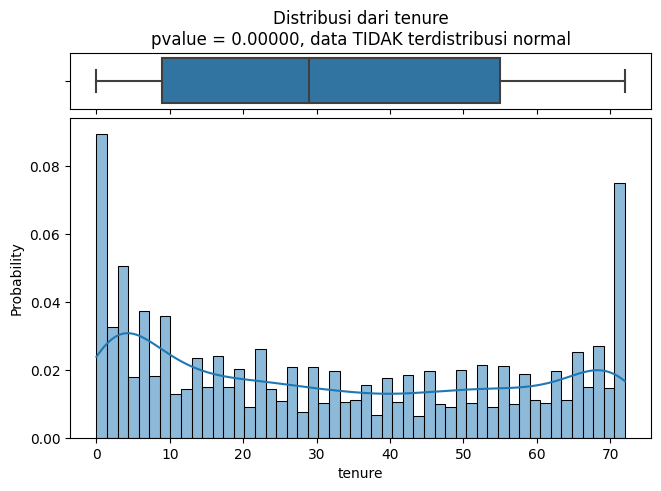

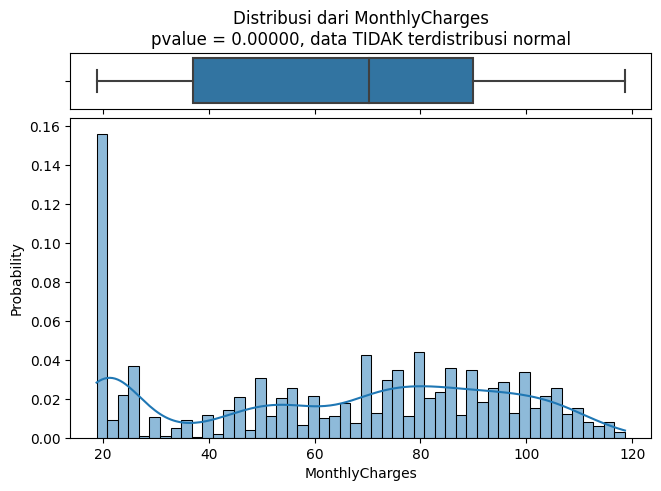

In [43]:
# Menampilkan persebaran data pada kolom numerikal dalam grafik boxplot, histplot dan pvaluenya
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribusi dari {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Kolom `tenure` dan `MonthlyCharges` tidak terdistribusi normal.
- Kolom `tenure` dan `MonthlyCharges` tidak memiliki outlier apabila dilihat dari boxplot.
- Kolom `tenure` dan `MonthlyCharges` apabila dilihat dari histplot sebaran data tidak membentuk sebuah lonceng (menandakan distribusi normal), maka untuk selanjutnya kolom tersebut akan menggunakan median sebagai bahan analisis.

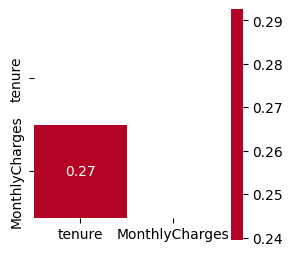

In [44]:
# Menampilkan korelasi antar kolom numerikal
plt.figure(figsize=(3,3))

matrix = np.triu(df[['tenure', 'MonthlyCharges']].corr(method='spearman'))
sns.heatmap(data=df[['tenure', 'MonthlyCharges']].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')

plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Antara kolom numerikal (`tenure` dan `MonthlyCharges`) memiliki korelasi positif dengan nilai 0.27 yang berarti berhubungan lemah.

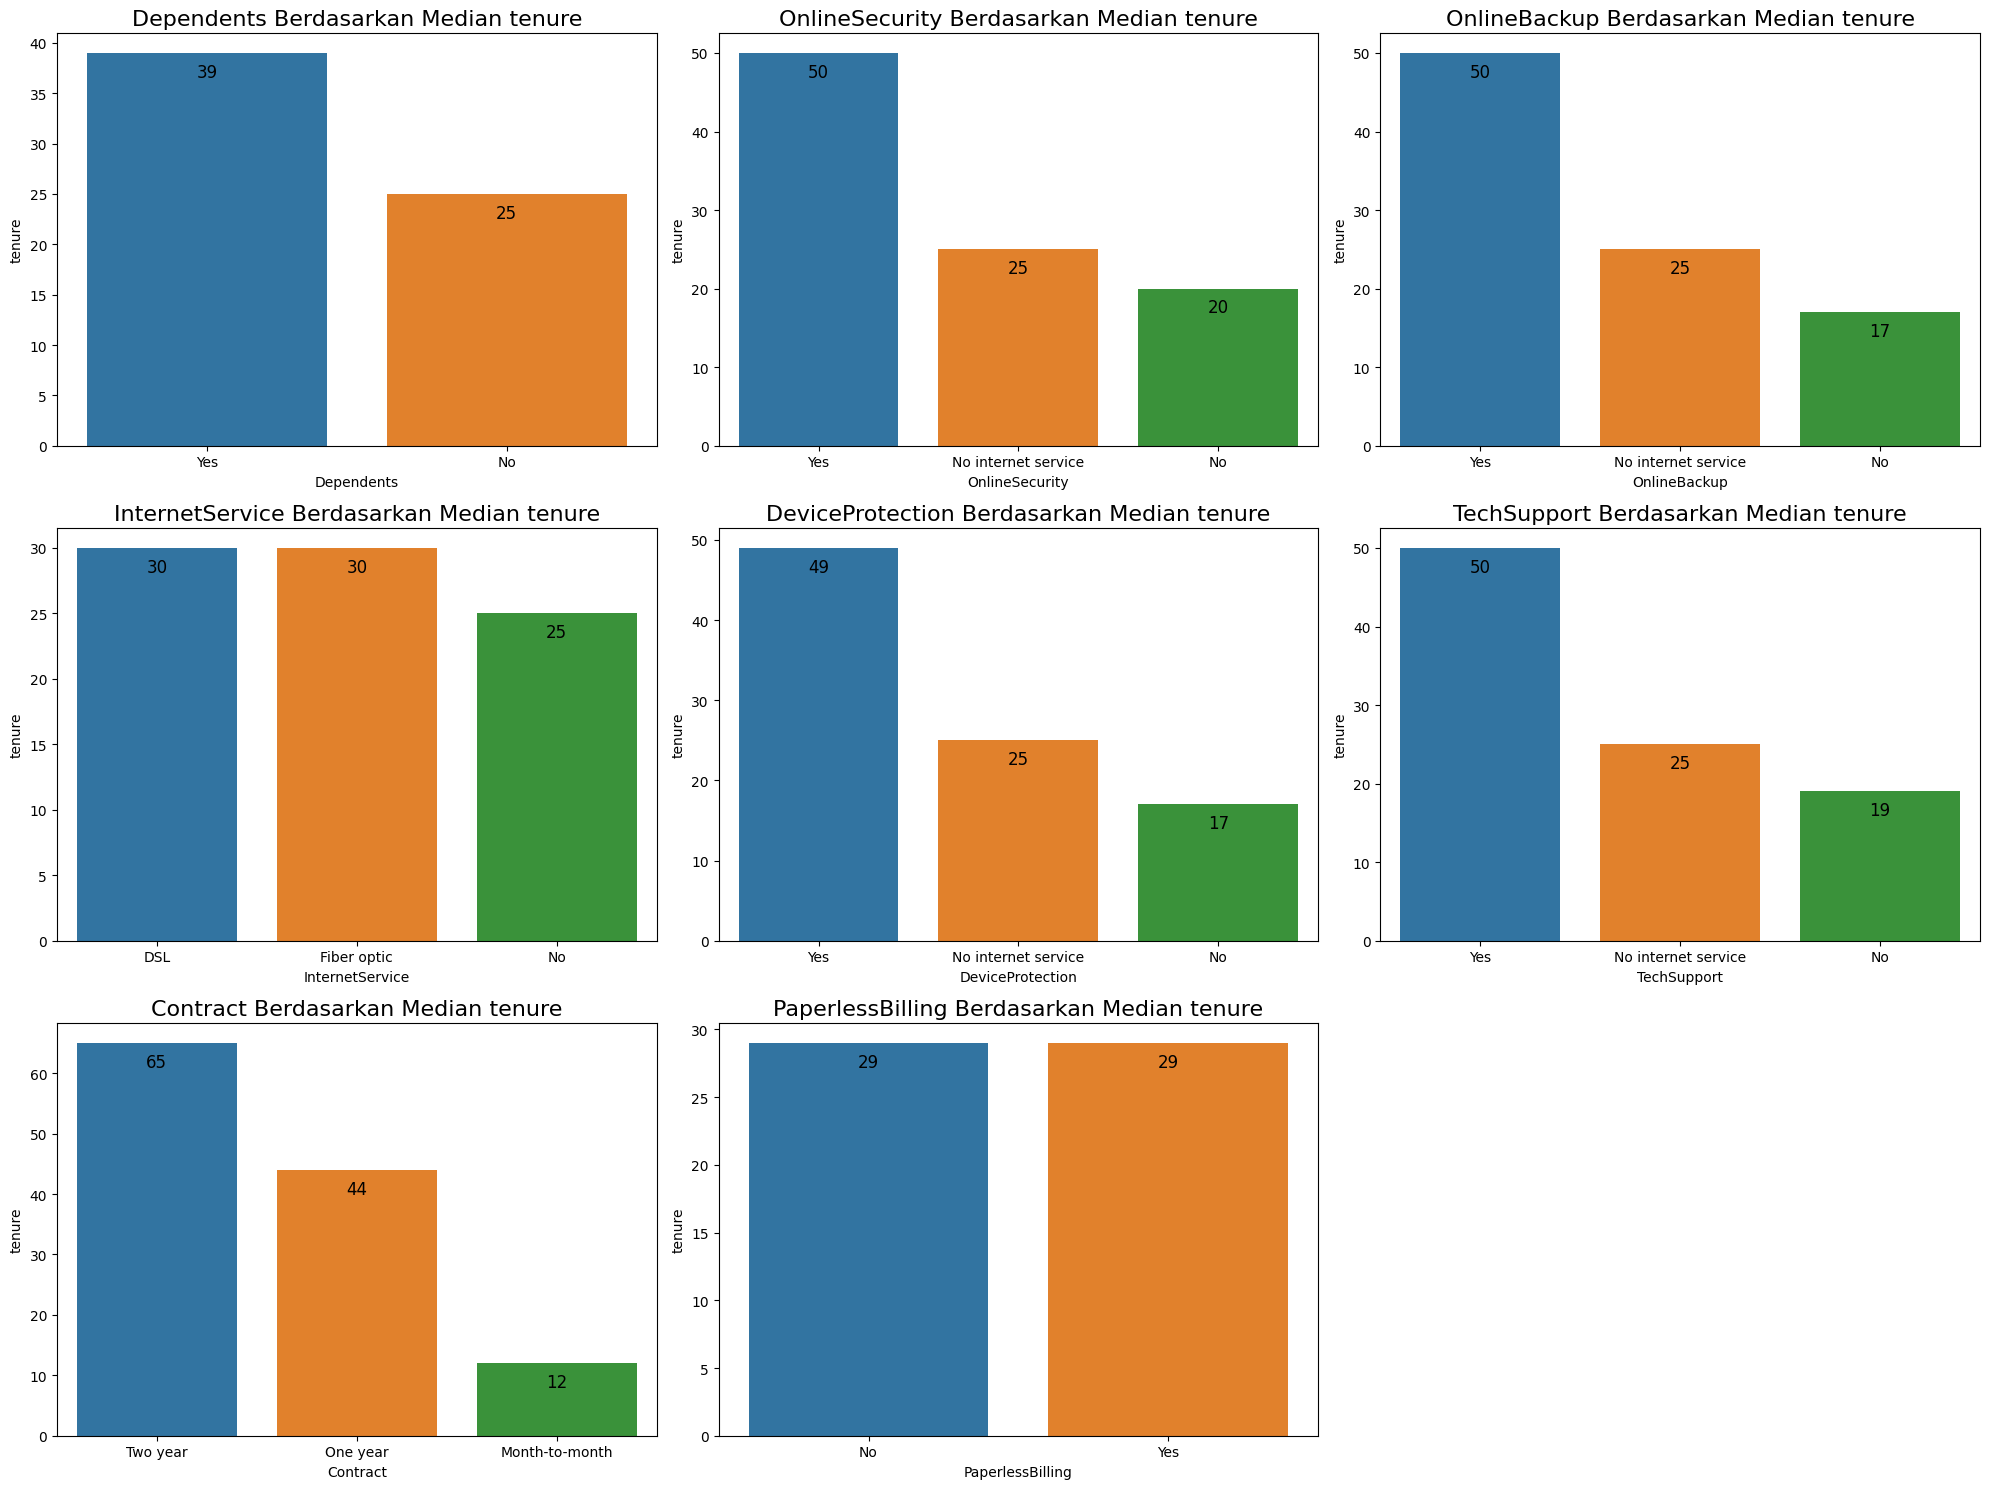

In [45]:
# Membuat barplot yang menampilkan median dari tenure terhadap kolom kategorikal (tanpa kolom target(Churn))
plt.figure(figsize=(20, 15))
plotnumber = 1
    
for kolom in categorical_features[:-1]:
    ax = plt.subplot(3,3, plotnumber)
    sns.barplot(data=df, y = 'tenure', x=kolom, errorbar=('ci', 0), estimator = 'median', order=df.groupby(kolom)['tenure'].median().sort_values(ascending=False).index.values)
    plt.title(f'{kolom} Berdasarkan Median tenure', fontsize=16)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], padding = -20, size= 12)
    plt.tight_layout()
    plotnumber += 1

plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Median `tenure` untuk pelanggan yang memiliki `Dependents` lebih tinggi dibanding pelanggan yang tidak memiliki `Dependents`.
- Median `tenure` untuk pelanggan yang menggunakan layanan `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` dan `TechSupport` lebih tinggi dibanding pelanggan yang tidak menggunakan layanan.
- Pada kolom `InternetService` median `tenure` memiliki nilai paling besar pada pelanggan yang menggunakan 'DSL' dan 'Fiber optic'.
- Median `tenure` untuk pelanggan dengan `Contract` 'Two year' lebih tinggi dibanding pelanggan dengan `Contract` 'One year' dan 'Month-to-month'.
- Pada kolom `PaperlessBilling` nilai median `tenure` menunjukan nilai yang sama.

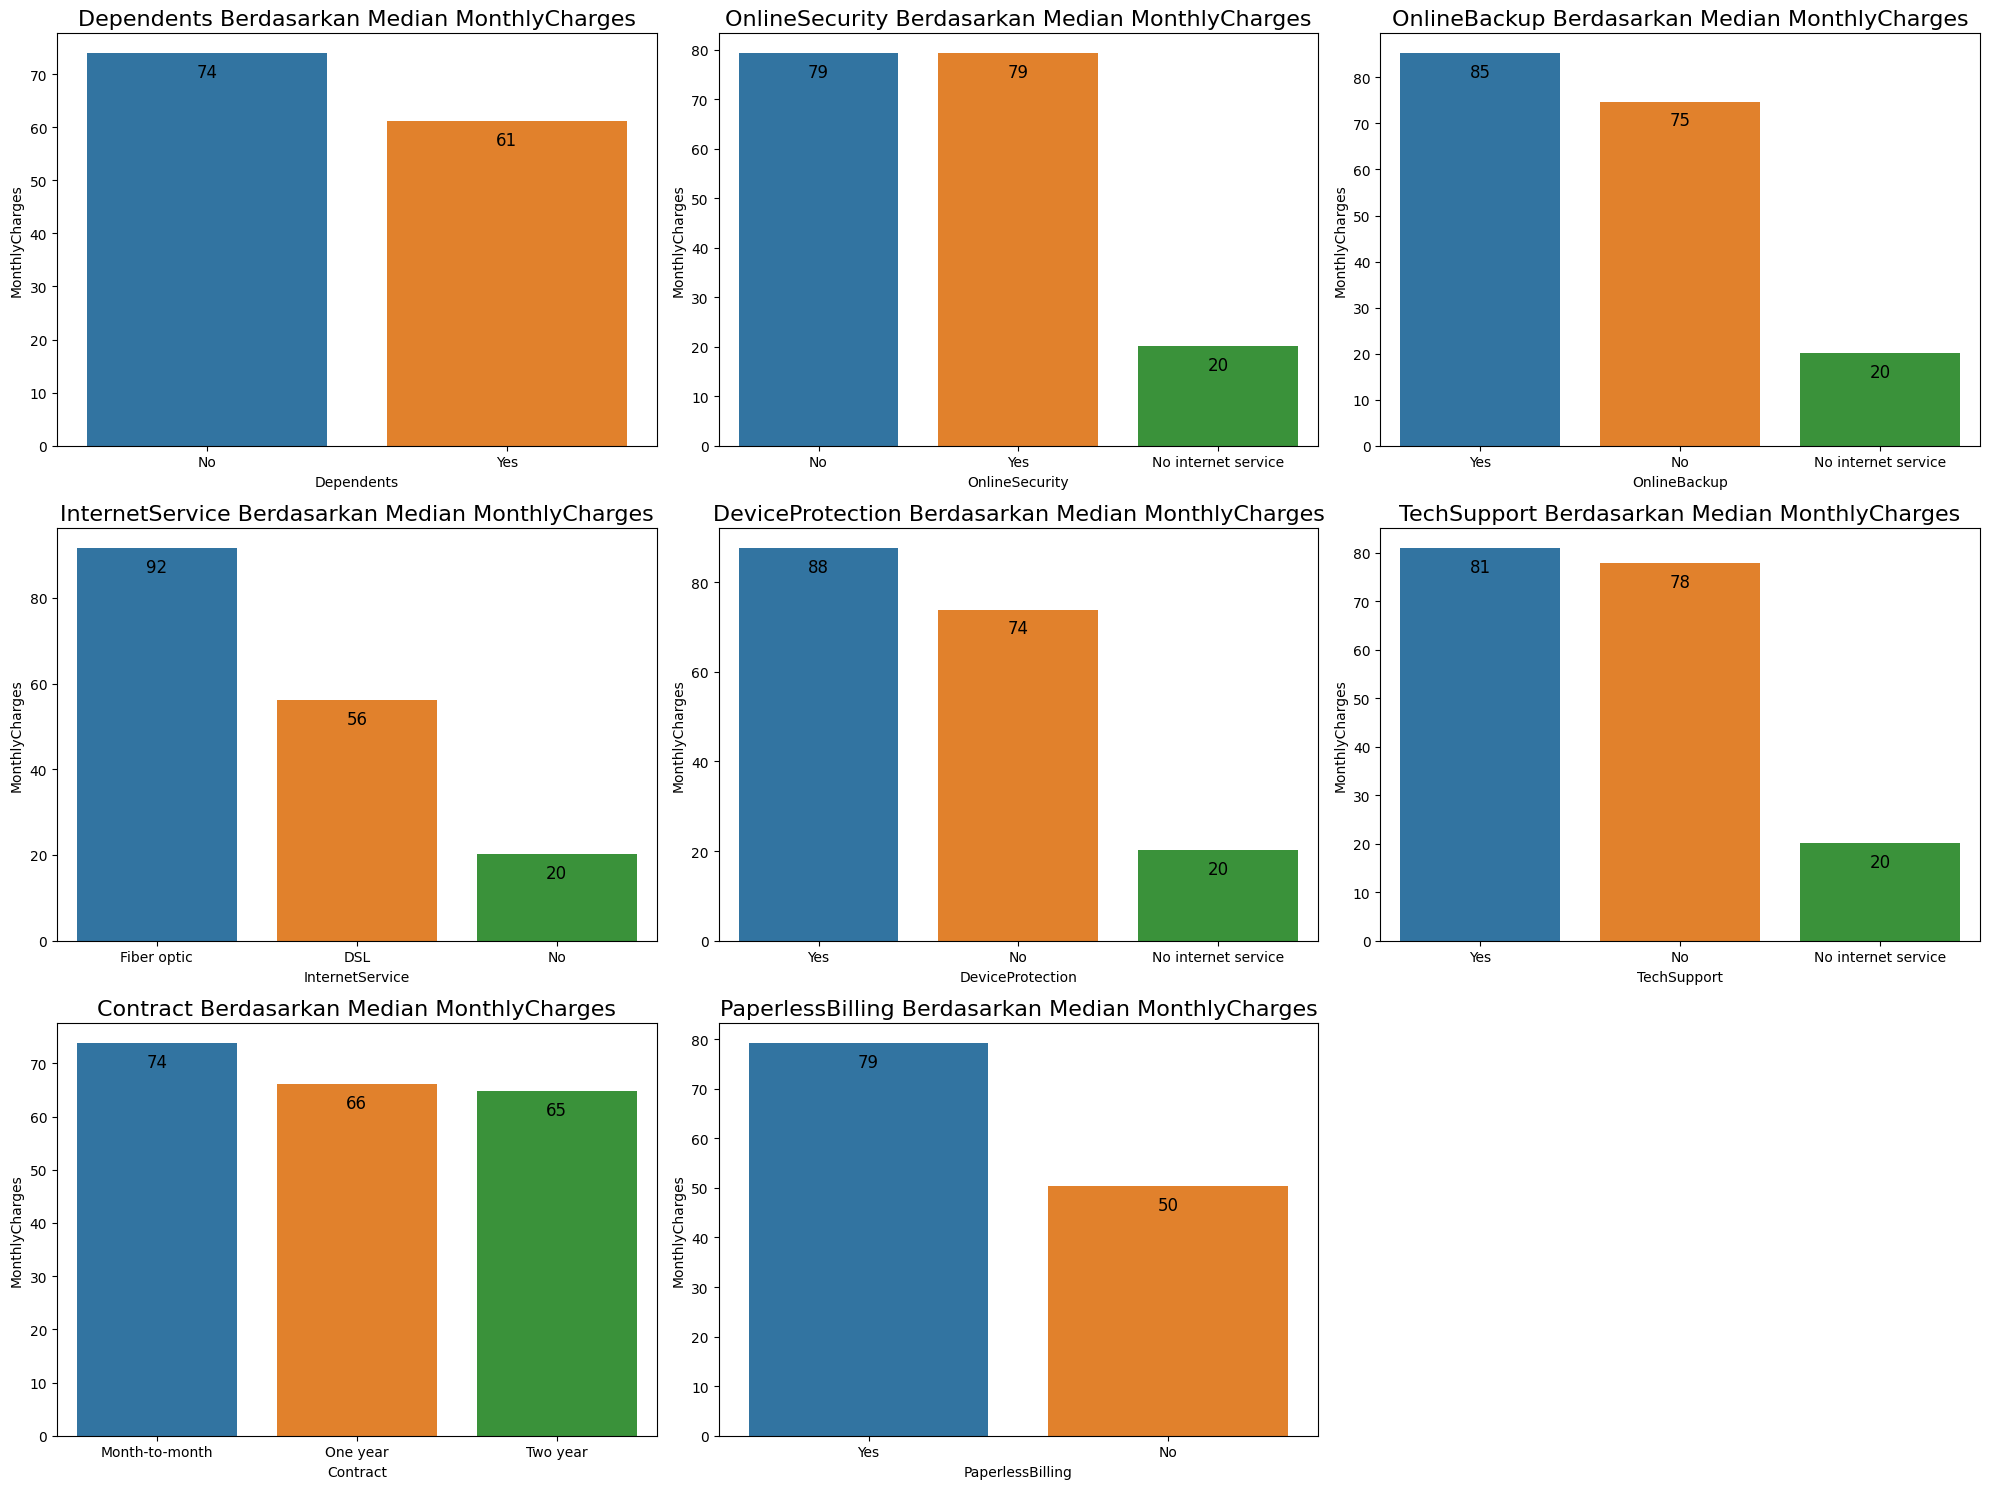

In [46]:
# Membuat barplot yang menampilkan median dari MonthlyCharges terhadap kolom kategorikal (tanpa kolom target(Churn))
plt.figure(figsize=(20, 15))
plotnumber = 1
    
for kolom in categorical_features[:-1]:
    ax = plt.subplot(3,3, plotnumber)
    sns.barplot(data=df, y = 'MonthlyCharges', x=kolom, errorbar=('ci', 0), estimator = 'median', order=df.groupby(kolom)['MonthlyCharges'].median().sort_values(ascending=False).index.values)
    plt.title(f'{kolom} Berdasarkan Median MonthlyCharges', fontsize=16)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], padding = -20, size= 12)
    plt.tight_layout()
    plotnumber += 1

plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Median `MonthlyCharges` untuk pelanggan yang tidak memiliki `Dependents` lebih tinggi dibanding pelanggan yang memiliki `Dependents`.
- Median `MonthlyCharges` untuk pelanggan yang menggunakan layanan `OnlineSecurity` dan tidak menggunakan layanan `OnlineSecurity` memiliki nilai yang sama.
- Median `MonthlyCharges` untuk pelanggan yang menggunakan layanan `OnlineBackup`, `DeviceProtection` dan `TechSupport` lebih tinggi dibanding pelanggan yang tidak menggunakan layanan.
- Pada kolom `InternetService` median `MonthlyCharges` memiliki nilai paling besar pada pelanggan yang menggunakan 'Fiber optic'.
- Median `MonthlyCharges` untuk pelanggan dengan `Contract` 'Month-to-month' lebih tinggi dibanding pelanggan dengan `Contract` 'One year' dan 'Two year', dapat diasumsikan semakin lama `Contract` yang dilakukan semakin rendah `MonthlyCharges` yang dibebankan.
- Pada kolom `PaperlessBilling` nilai median `MonthlyCharges` menunjukan pelanggan yang menggunakan `PaperlessBilling` lebih tinggi dibanding yang tidak.

## **3.2** ***Categorical Features***

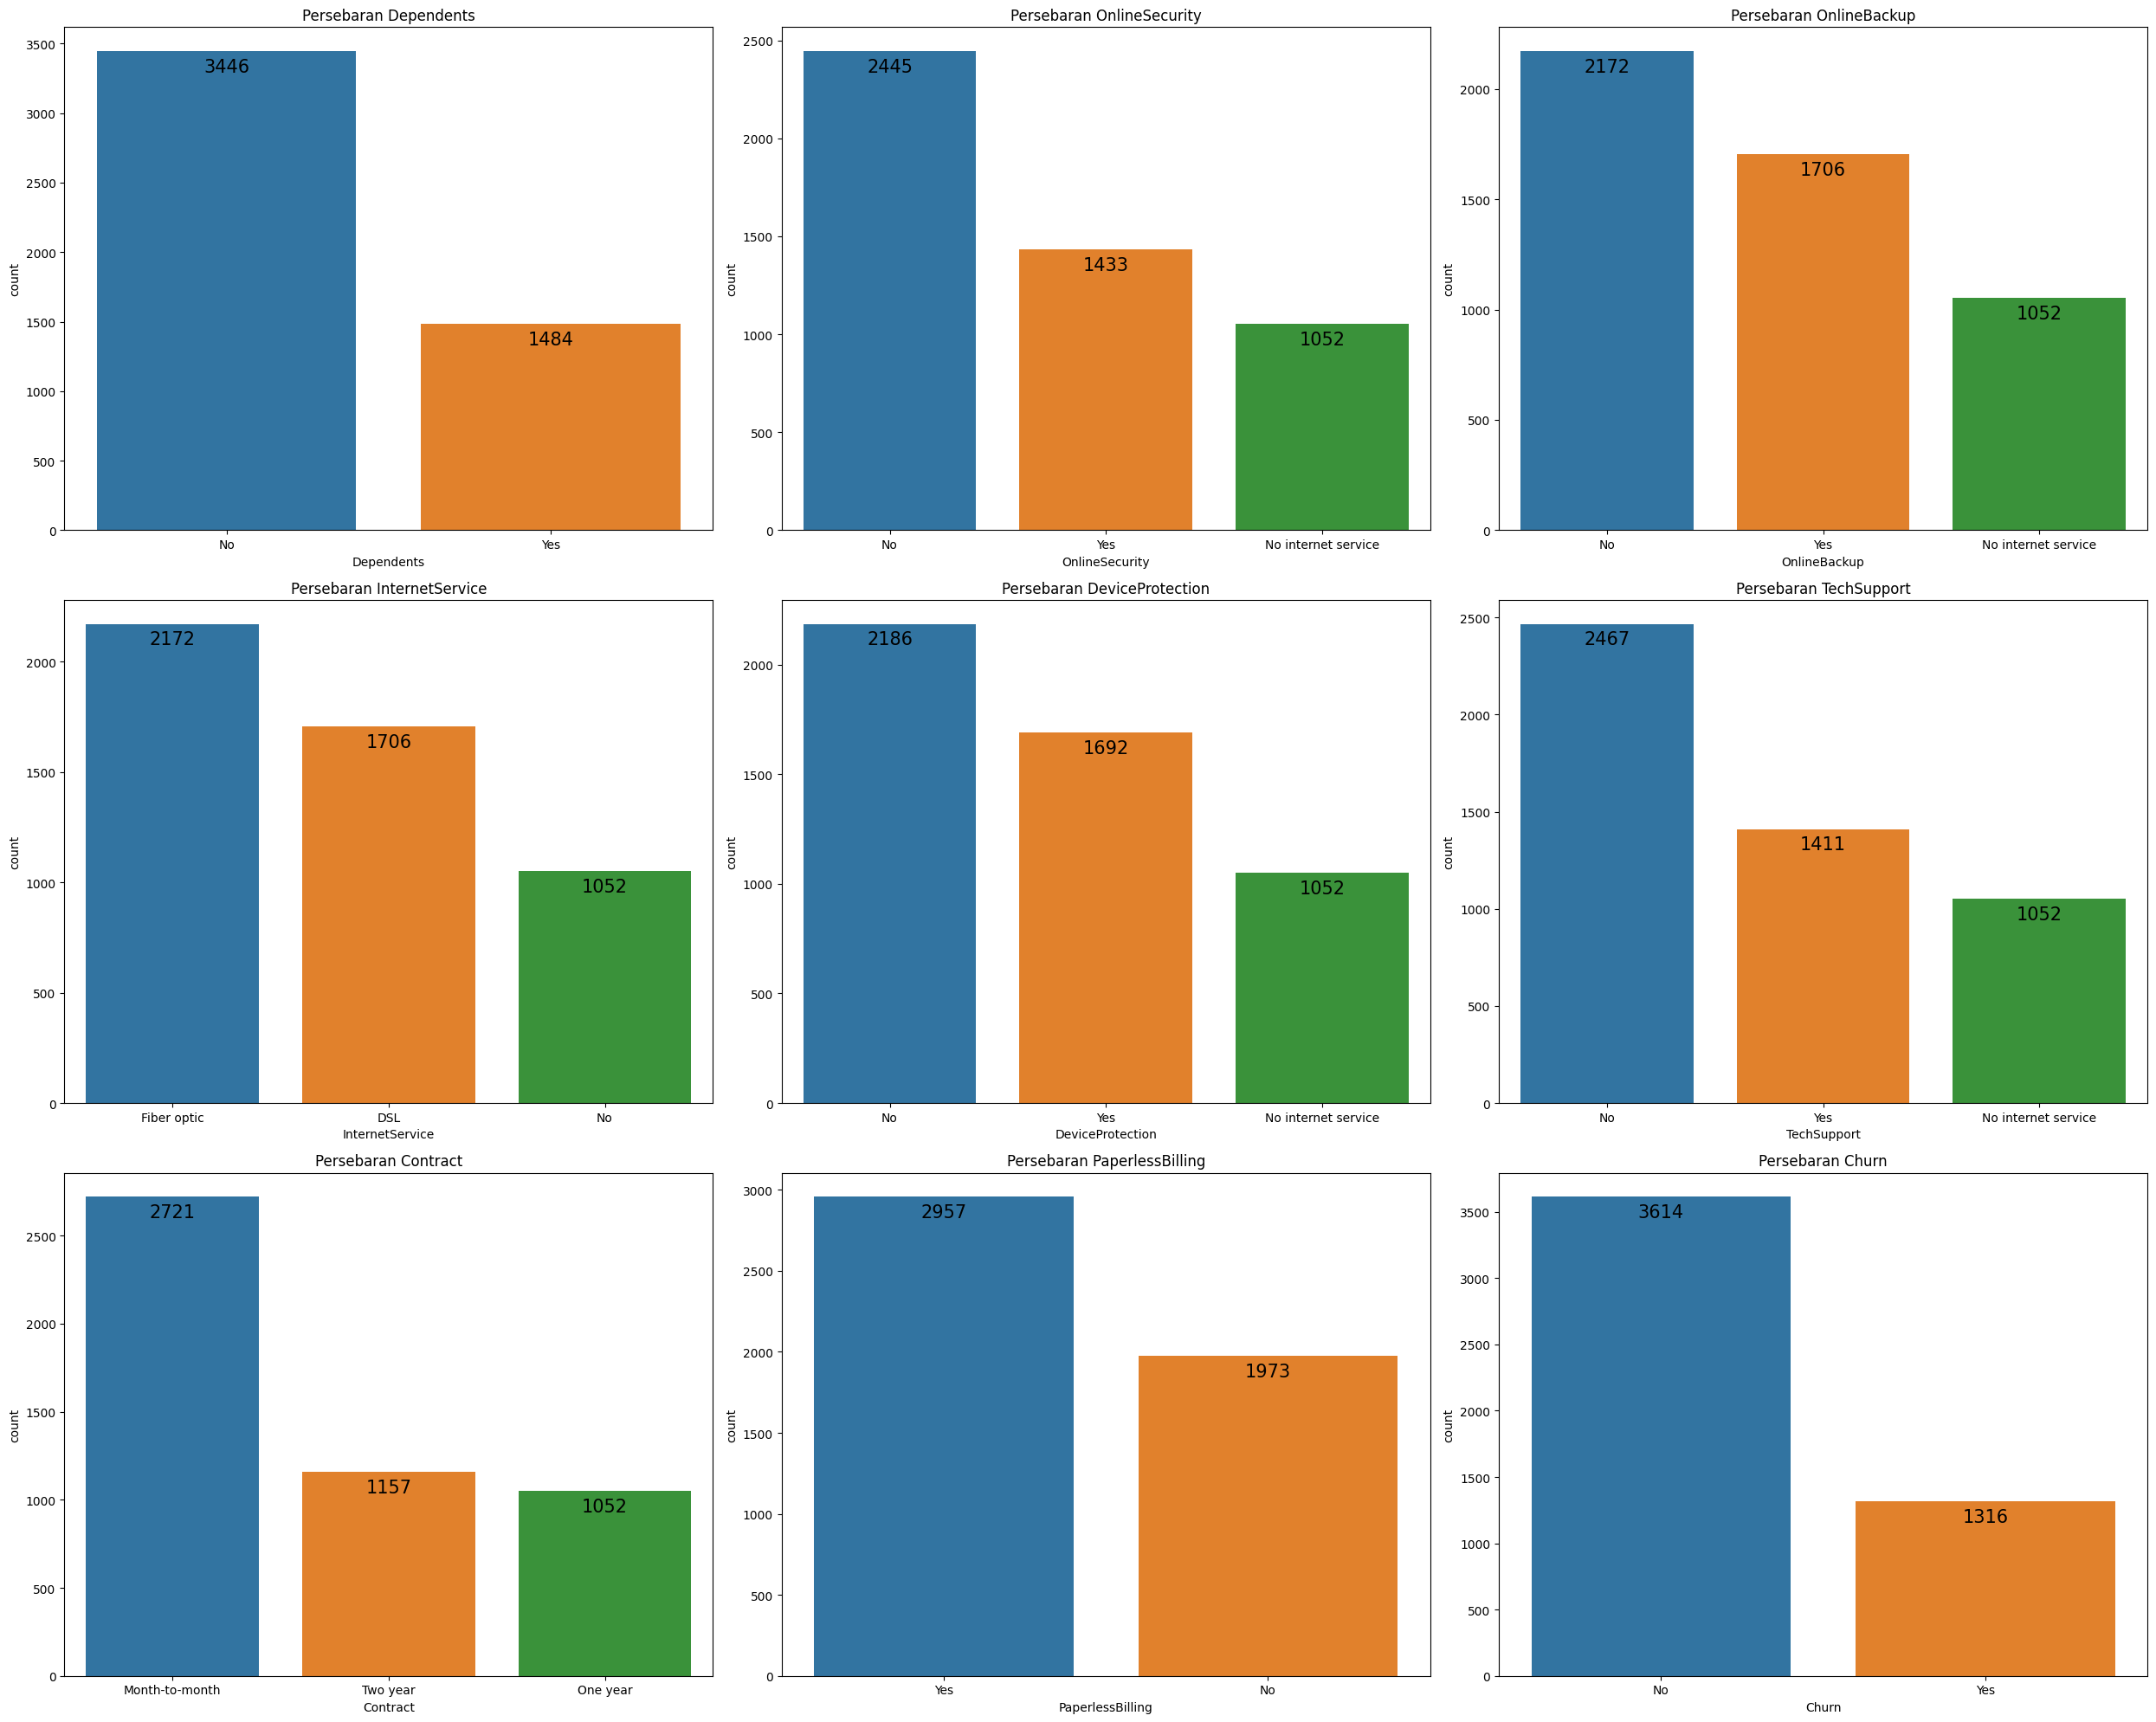

In [47]:
# Menampilkan kolom kategorikal dalam bentuk barplot
fig, axes = plt.subplots(3, 3, figsize=(25, 20)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, x= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'Persebaran {i}',size = 12)
    ax.bar_label(ax.containers[0], padding= -20, size=15)
    plt.tight_layout()

plt.show()

Berdasarkan informasi di atas, diketahui bahwa :
- `Dependents` : Mayoritas pelanggan tidak memiliki tanggungan.
- `OnlineSecurity`, `OnlineBackup`, `Device Protection`, dan `Tech Support` : Mayoritas pelanggan tidak menggunakan layanan pada kolom tersebut.
- `InternetService` : Mayoritas pelanggan menggunakan layanan internet 'Fiber optic' (saluran transmisi atau sejenis kabel yang terbuat dari kaca atau plastik yang sangat halus dan lebih kecil dari sehelai rambut dan dapat digunakan untuk mentransmisikan sinyal cahaya dari suatu tempat ke tempat lain).
- `Contract` : Mayoritas pelanggan menggunakan kontrak 'Month-to-month'.
- `PaperlessBilling` : Mayoritas pelanggan menggunakan tagihan tanpa kertas.
- `Churn` : Mayoritas pelanggan pada dataset ini adalah tidak Churn.

## **3.3** ***Target vs Features***

### **3.3.1** ***Target vs Numerical Features***

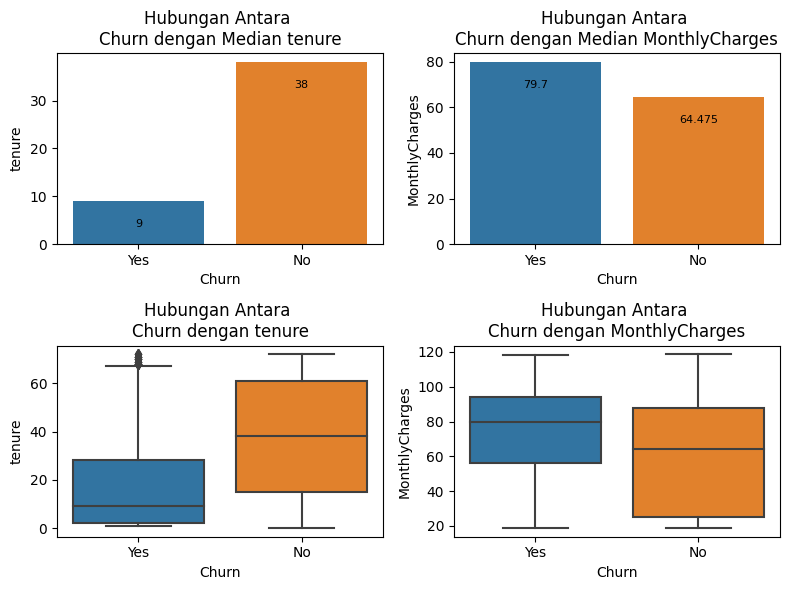

In [48]:
# Menampilkan barplot dan boxplot antara kolom churn dan kolom numerikal
plt.figure(figsize=(8, 6))
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.barplot(x = 'Churn', y = feature, data = df, estimator=np.median, errorbar=('ci', 0))
    plt.ylabel(feature)
    plt.title(f'Hubungan Antara \nChurn dengan Median {feature}')
    ax.bar_label(ax.containers[0], padding= -20, size=8)  
    plotnumber += 1
    plt.tight_layout()

for feature in numerical_features:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=df);
    plt.title(f'Hubungan Antara \nChurn dengan {feature}')
    plt.tight_layout()
    plotnumber = plotnumber + 1

plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Pelanggan yang memiliki `tenure` rendah cenderung melakukan *churn*.
- Pelanggan yang memiliki `MonthlyCharges` rendah cenderung tidak melakukan *churn*.
- Pada kolom `tenure` dan `MonthlyCharges`, distribusi dari nilai pelanggan yang tidak *churn* termasuk dalam IQR yang lebih besar dibandingkan pelanggan yang melakukan *churn*.
- Pada kolom `tenure` terdapat outlier yang data tersebut berisi dengan data pelanggan *churn*, maka outlier tersebut tidak akan dihapus karena berisi dengan data yang penting.

### **3.3.2** ***Target vs Categorical Features***

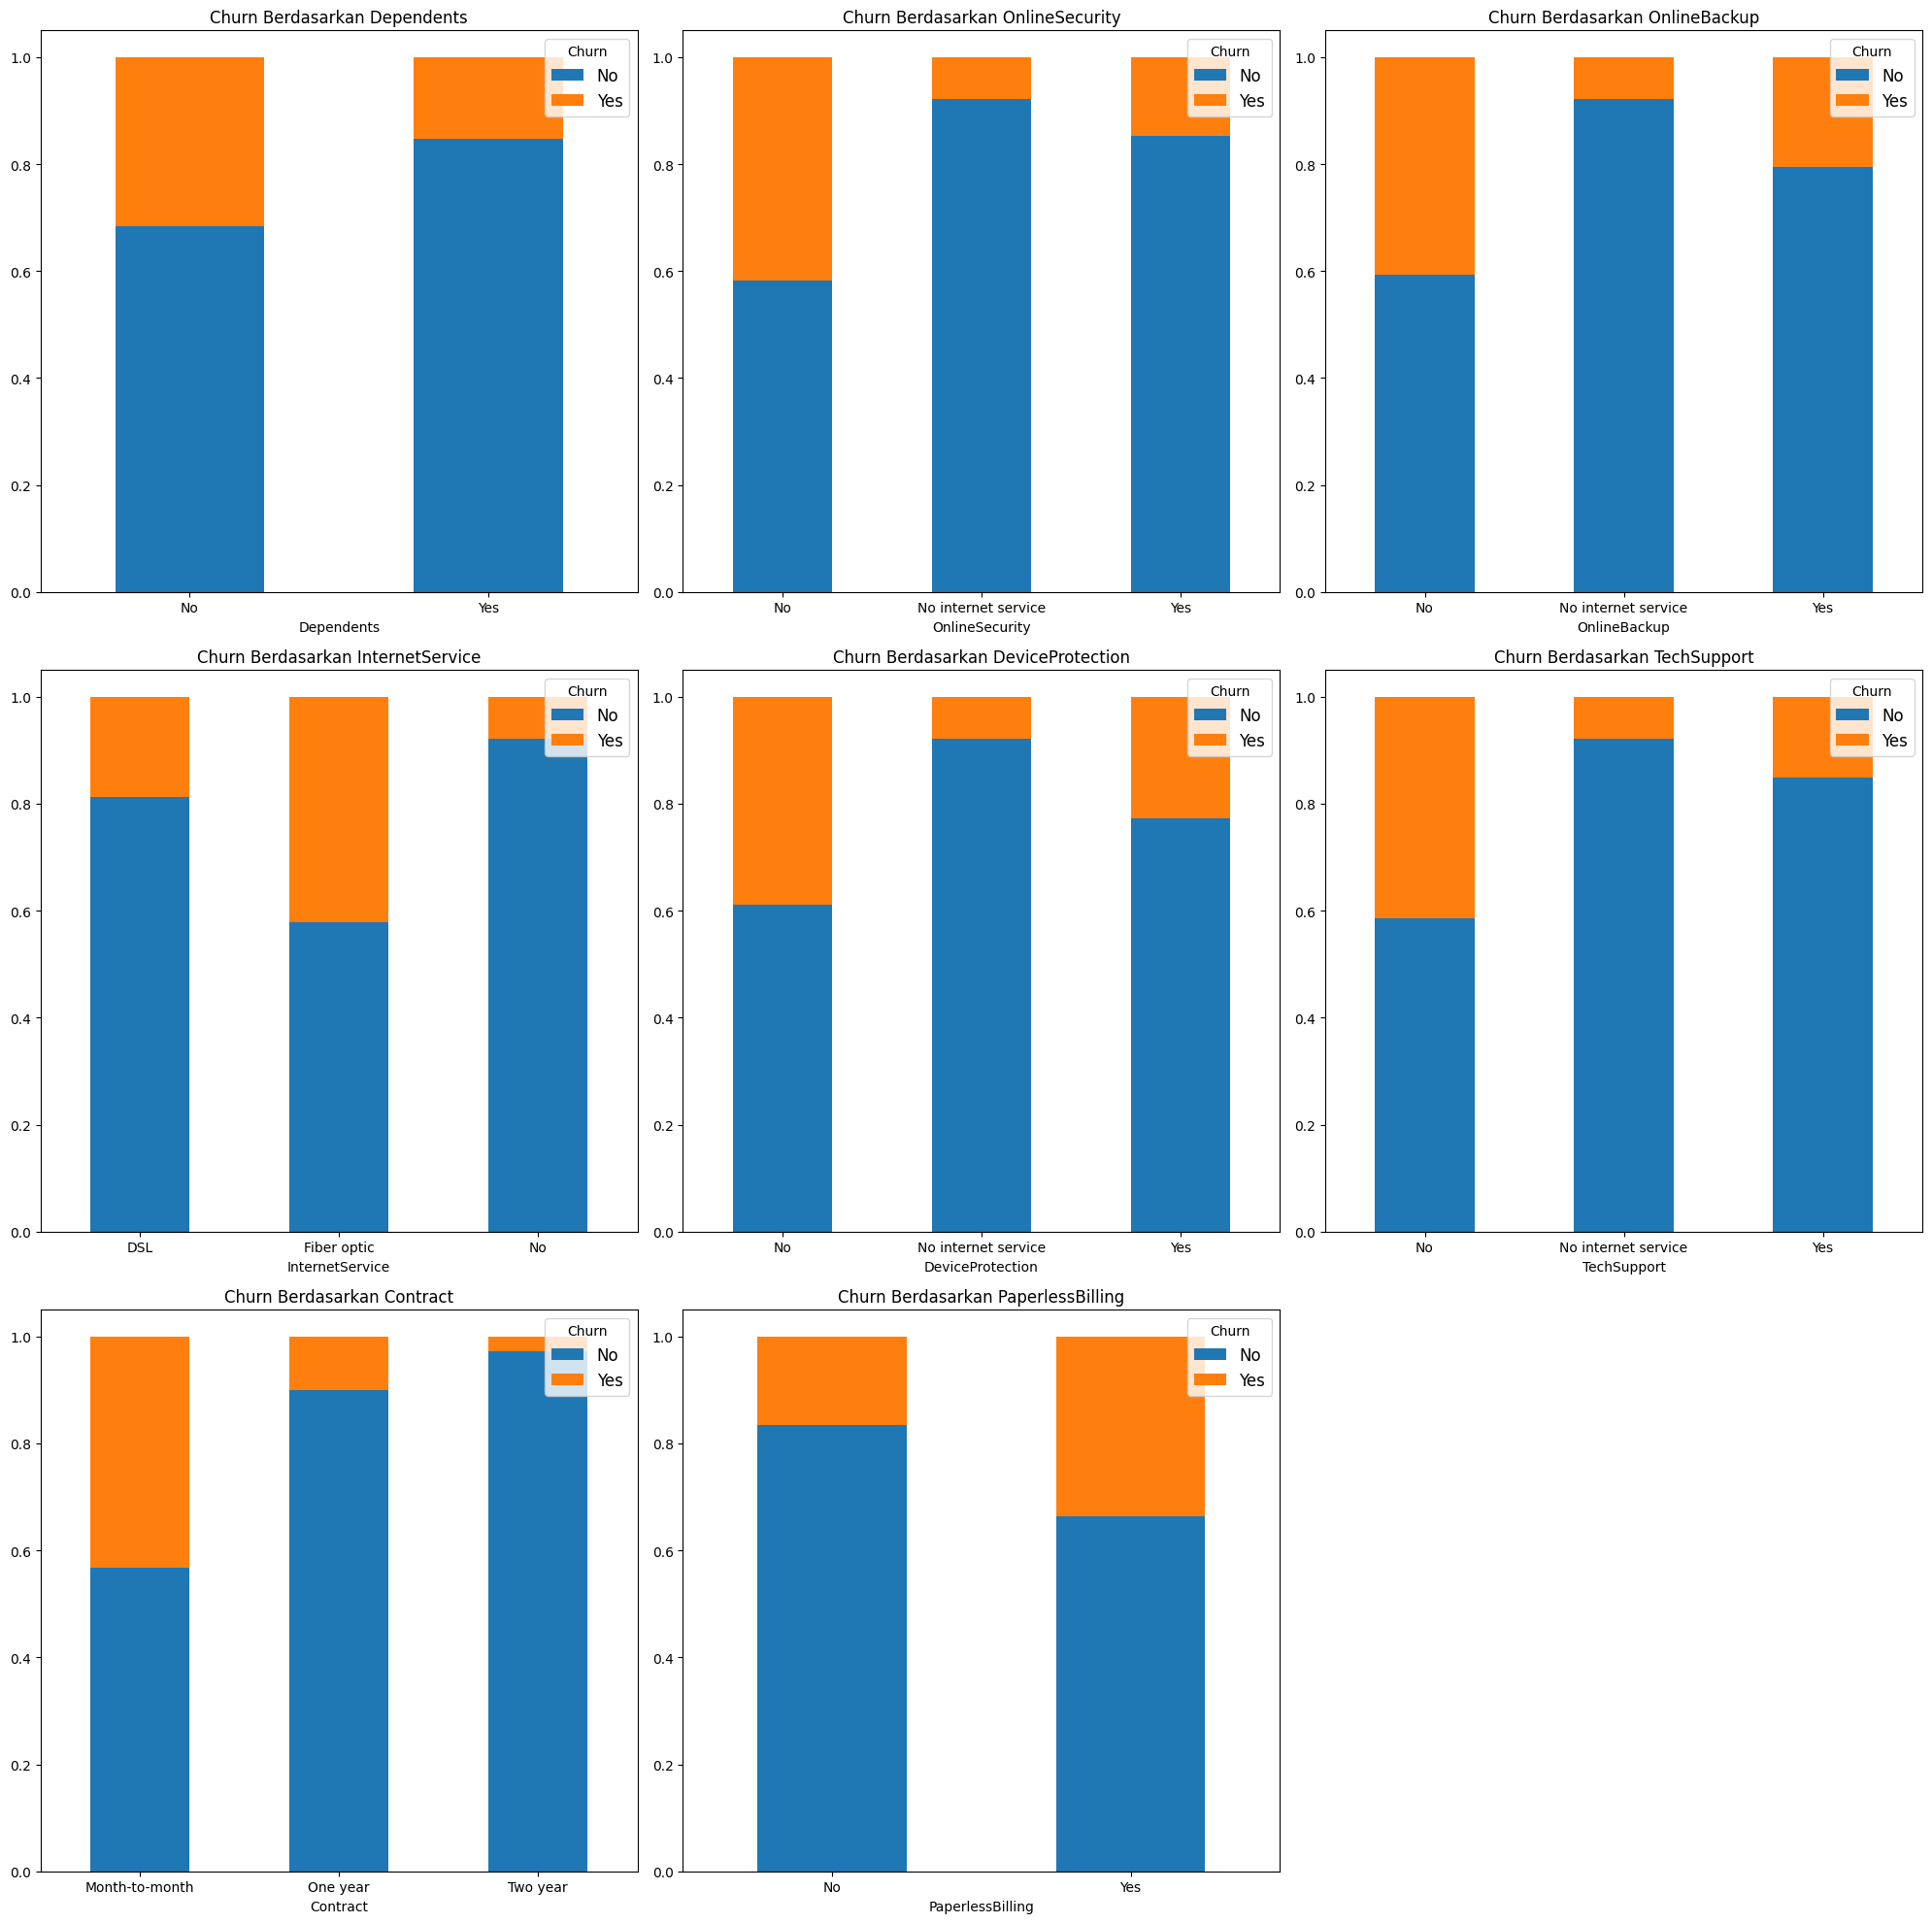

In [49]:
# Menampilkan perbandingan churn atau tidak pada tiap kolom kategorikal 
plotnumber = 1
fig = plt.figure(figsize=(20,20))

for feature in categorical_features[:-1]:
    ax= plt.subplot(3,3,plotnumber)
    pd.crosstab(df[feature],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()
    plt.title(f'Churn Berdasarkan {feature}', size= 12)
    plt.xticks(rotation=0)
    plt.legend(loc = 'upper right', prop={'size':12},title = 'Churn')
    plotnumber +=1

plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Pelanggan yang tidak memiliki `Dependent` cenderung melakukan *churn*, dibandingkan dengan yang memiliki `Dependet`.
- Pelanggan yang tidak menggunakan layanan `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` dan `TechSupport` cenderung melakukan *churn*, dibandingkan yang menggunakan layanan.
- Pelanggan yang menggunakan 'Fiber optic' sebagai `InternetDevice` cenderung melakukan *churn*, dibandingkan dengan pelanggan yang menggunakan 'DSL' dan tidak menggunakan `InternetService`
- Pelanggan yang memiliki `Contract` 'Month-to-month' cenderung melakukan *churn*, dibandingkan dengan `Contract` 'One year' dan 'Two year'.
- Pelanggan yang menggunakan `Paperlissbilling` cenderung melakukan *churn*, dibandingkan dengan yang tidak.

<hr>

# **4.** ***Data Preprocessing***

## **4.1** ***Drop Duplicates***

In [50]:
df.shape

(4930, 11)

Jumlah baris dan kolom sebelum menghapus duplikat adalah 4930 baris dan 11 kolom.

In [51]:
df.duplicated().sum()

77

In [52]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(4853, 11)

Jumlah baris dan kolom setelah menghapus duplikat adalah 4853 baris dan 11 kolom.

## **4.2** ***Outliers***

Secara umum tidak terdapat outlier pada kolom `tenure` dan `MonthlyCharges`. Pada tabel dibawah ini akan lebih memastikan bahwa seluruh data pada kolom tersebut masih berada pada rentang *Lower Fence* dan *Upper Fence*.

In [53]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal
# mencari berapa banyak data yang tidak termasuk outlier dan berapa banyak data yang termasuk outlier

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Inside' : number_inside,
    '# Lower' : number_lower,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

,Kolom,Lower,Upper,# Inside,# Lower,# Upper,% Outlier
0,tenure,-61.50,126.50,4853,0,0,0.0
1,MonthlyCharges,-34.95,165.05,4853,0,0,0.0


Berdasarkan informasi di atas, dapat diketahui bahwa :
- Tidak terdapat data outlier, hal ini serupa saat mengecek boxplot pada kolom numerikal.

## **4.3** ***Encoding***

In [54]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)

# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,3,"[No, No internet service, Yes]"
2,OnlineBackup,3,"[No, No internet service, Yes]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[No, No internet service, Yes]"
5,TechSupport,3,"[No, No internet service, Yes]"
6,Contract,3,"[Month-to-month, One year, Two year]"
7,PaperlessBilling,2,"[No, Yes]"
8,Churn,2,"[No, Yes]"


Melakukan fitur encoding untuk fitur-fitur kategorikal, maka yang akan dilakukan adalah:

- Merubah fitur/kolom `Dependents`, `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `Contract` dan `PaperlessBilling` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal dan juga jumlah data uniknya hanya sedikit.
- Tidak melakukan apa-apa pada fitur/kolom `Churn`, karena nantinya kolom ini akan menjadi target dari modeling yang akan dilakukan

In [56]:
# transformer 
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport','Contract', 'PaperlessBilling']),
], remainder='passthrough')

## **4.4** ***Scaling***

Pada pemodelan akan dilakukan *scaling*, karena dalam pembuatan model nantinya akan dicoba menggunakan algoritma Logistic Regression dan KNN. Kedua algoritma tersebut membutuhkan *scaling* untung mengeluarkan pemodelan terbaik. Pemodelan diharapkan diharapkan memiliki skala yang sama sehingga akan maksimal dalam target.

Dalam tahapan *scaling*, kita dapat menggunakan seluruh metode *scaling* yang ada, karena pada kolom numerikal (`tenure` dan `MonthlyCharges`) tidak memiliki outlier. Namun pengaturan scaler nantinya akan menggunakan seluruh scaler yang ada pada tahapan *tuning* untuk mendapatkan scaler terbaik.

In [57]:
# scaling features 
robust = RobustScaler()

# untuk tuning
standard = StandardScaler()
minmax = MinMaxScaler()

## **4.5** ***Imbalance Data*** 

In [58]:
df['Churn'].value_counts() / len(df)

Churn
No     0.734597
Yes    0.265403
Name: count, dtype: float64

Target tidak seimbang karena proporsi kelas minoritas hanya sebesar 26% dan tergolong dalam *mild imbalance* karena berada dalam rentang 20%-40% dari dataset ([Sumber](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)). Untuk mensiasati hal tersebut nantinya kita dapat menguji apakah modeling perlu menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang.

Adapun metode resampling yang akan dipakai adalah SMOTE. Namun pengaturan ulang resampler nantinya akan dilakukan pada tahapan tuning untuk mendapatkan resampler terbaik.

In [59]:
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)
nearmiss = NearMiss()

## **4.6** ***Change Value Target***

Mengubah nilai pada kolom `Churn` hal ini dilakukan karena fokus utama adalah *churn*. Maka perlu dilakukan pengubahan nilai pada target. Pengubahan nilai akan dilakukan, sebagai berikut :
- 0 : Tidak melakukan *churn*
- 1 : Melakukan *churn*

In [62]:
# Mengubah data pada kolom Churn, apabila Yes = 1, No =0
df['Churn'] = np.where(df['Churn']=='Yes',1,0)
df['Churn'].value_counts()

Churn
0    3565
1    1288
Name: count, dtype: int64

Nilai pada kolom `Churn` sudah berubah menjadi 1 dan 0.

<hr>

# **5.** ***Modeling***

## **5.1** ***Define Features (X) and Target (y)***

Mengelompokan kolom *features* dan *target* :
- *Features* : `Dependents`, `tenure`, `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `Contract`, `PaperlessBilling`, `MonthlyCharges`.
- *Target* : `Churn`.

In [65]:
# features
X = df.drop(columns='Churn')

# target
y = df['Churn']

## **5.2** ***Data Splitting*** 

Pada pemodelan akan menggunakan test size sebesar 20% dari keseluruhan data, lalu karena pada kasus ini adalah kasus klasifikasi maka akan menggunakan stratify = y, agar persentase target pada data train dan test akan serupa.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## **5.3** ***Model Benchmark***

- Pada tahapan ini akan digunakan 7 algoritma untuk menentukan *model benchmark* terbaik. 
- Seperti yang sudah disebutkan pada *metric evaluation* dalam bab *Business Understanding*, metric yang akan digunakan adalah metric f2_score.
- Pada tahapan cross validation, akan menggunakan n_splits = 5 dan juga *stratified* karena pada kasus ini adalah kasus klasifikasi.

In [67]:
# Model yang akan digunakan

# Logistic Regression
logreg = LogisticRegression(random_state=0)

# KNeighbors
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0)

In [68]:
# create scorer metriks
f2_score = make_scorer(fbeta_score, beta=2)

In [69]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

### **5.3.1** ***Default Hyperparameter : Cross Validation***

In [70]:
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost]

list_mean_wos = []
list_std_wos = []
list_score_wos = []
list_mean_ws = []
list_std_ws = []
list_score_ws = []

for algoritma in models:
    # model cv tanpa sampling
    pipe_model_wos=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('model', algoritma)
    ])

    model_cv_wos = cross_val_score(
        estimator=pipe_model_wos,
        X=X_train,
        y=y_train,
        cv=skf,
        scoring=f2_score
    )

    list_mean_wos.append(model_cv_wos.mean())
    list_std_wos.append(model_cv_wos.std())
    list_score_wos.append(model_cv_wos.round(3))

    # model cv dengan sampling
    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv_ws = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring=f2_score
    )

    list_mean_ws.append(model_cv_ws.mean())
    list_std_ws.append(model_cv_ws.std())
    list_score_ws.append(model_cv_ws.round(3))

In [71]:
pd.DataFrame({
    'model' : ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier'],
    'mean f2 wos' : list_mean_wos,
    'std f2 wos' : list_std_wos,
    'score wos' : list_score_wos,
    'mean f2 ws' : list_mean_ws,
    'std f2 ws' : list_std_ws,
    'score ws' : list_score_ws
}).sort_values('mean f2 ws', ascending=False)

,model,mean f2 wos,std f2 wos,score wos,mean f2 ws,std f2 ws,score ws
4,AdaBoostClassifier,0.538386,0.016748,"[0.536, 0.557, 0.554, 0.534, 0.51]",0.713740,0.013604,"[0.693, 0.732, 0.715, 0.705, 0.724]"
0,LogisticRegression,0.538751,0.027599,"[0.547, 0.524, 0.537, 0.585, 0.502]",0.704259,0.018751,"[0.68, 0.722, 0.69, 0.701, 0.729]"
5,GradientBoostingClassifier,0.539464,0.024943,"[0.549, 0.548, 0.552, 0.558, 0.49]",0.692203,0.020077,"[0.665, 0.69, 0.678, 0.722, 0.706]"
1,KNeighborsClassifier,0.489872,0.013897,"[0.507, 0.499, 0.497, 0.479, 0.468]",0.623099,0.009608,"[0.626, 0.625, 0.613, 0.639, 0.613]"
6,XGBClassifier,0.513122,0.024923,"[0.496, 0.506, 0.506, 0.562, 0.496]",0.608151,0.028015,"[0.567, 0.624, 0.585, 0.644, 0.621]"
3,RandomForestClassifier,0.497067,0.011190,"[0.511, 0.506, 0.481, 0.488, 0.5]",0.583439,0.011290,"[0.605, 0.581, 0.583, 0.573, 0.575]"
2,DecisionTreeClassifier,0.480270,0.014212,"[0.503, 0.481, 0.458, 0.482, 0.478]",0.568267,0.014583,"[0.572, 0.594, 0.564, 0.552, 0.559]"


Berdasarkan informasi di atas, dapat diketahui bahwa :
- Nilai rata-rata dari pemodelan lebih baik menggunakan sampling dibandingkan tidak menggunakan sampling, melakukan sampling dapat meningkatkan performa-performa algoritma. Berdasarkan hal ini, pemodelan menggunakan sampling lebih baik daripada tidak menggunakan sampling. Hal tersebut sejalan dengan tujuan pemodelan yaitu untuk meminimalisir pelanggan yang aktualnya *churn* tapi diprediksi tidak *churn* (*False Negative*).
- Pada hasil pemodelan algoritma Adaboost menjadi algoritma yang memiliki nilai rata-rata f2_score paling tinggi dengan tingkat kestabilan model yang cukup stabil.

### **5.3.2** ***Default Hyperparameter : Train, CV, Test Data***

In [75]:
list_f2_score_train = []
list_f2_score_test = []

# Mencari nilai model berdasarkan f2 score terbesar 
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    list_f2_score_train.append(fbeta_score(y_train, y_pred_train, beta=2))
    list_f2_score_test.append(fbeta_score(y_test, y_pred_test, beta=2))

In [138]:
# Perbandingan performa antar model
df_benchmark = pd.DataFrame({
    'model':['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier'],
    'f2_score (train set)' : list_f2_score_train,
    'f2_score (validation set)' : list_mean_ws,
    'f2_score (test_set)': list_f2_score_test
}).sort_values('f2_score (test_set)', ascending=False)

df_benchmark

,model,f2_score (train set),f2_score (validation set),f2_score (test_set)
4,AdaBoostClassifier,0.721424,0.713740,0.734463
0,LogisticRegression,0.713163,0.704259,0.730337
5,GradientBoostingClassifier,0.725865,0.692203,0.715820
1,KNeighborsClassifier,0.803587,0.623099,0.605951
6,XGBClassifier,0.864057,0.608151,0.589135
2,DecisionTreeClassifier,0.982056,0.568267,0.515267
3,RandomForestClassifier,0.994390,0.583439,0.495706


Berdasarkan informasi di atas, dapat diketahui bahwa :
- Model **AdaBoost**, **LogisticRegression** dan **GradientBoost** memiliki hasil yang cukup stabil pada train, validation dan test set.
- Model **KNeighbors**, **XGBoost**, **DecisionTree** dan **RandomForest** memiliki nilai yang baik pada train set, tetapi pada validation test set performanya tidak baik. Hal ini bisa saja terjadi karena keempat model tersebut overfitting atau terlalu banyak belajar karena parameternya tidak dibatasi.
- Berdasarkan tabel di atas, maka yang selanjutnya akan dilakukan hyperparameter tuning adalah model **AdaBoost**, **LogisticRegression** dan **GradientBoost**, karena ketiga model tersebut pada train, validation dan testnya cukup stabil.

## **5.4** ***Hyperparameter Tuning : RandomSearch***

### **5.4.1 AdaBoost**

In [103]:
# Benchmark model 1
adaboost = AdaBoostClassifier(random_state=0)

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'resampler':[smote, rus, ros, nearmiss, None],
    'scaler' : [robust, minmax, standard, None],
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', adaboost)
])

# Hyperparameter tuning
random_adaboost = RandomizedSearchCV(
    estimator=estimator_adaboost, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [104]:
# fitting 
random_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling'])])),
                                             ('scaler', Robu...
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(), None],
                                        'scaler': [RobustScaler(),
                                                   MinMaxScaler(),
                                                   StandardScaler(), None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [105]:
random_adaboost.best_params_

{'scaler': None,
 'resampler': RandomUnderSampler(random_state=0),
 'model__n_estimators': 171,
 'model__learning_rate': 0.03,
 'model__algorithm': 'SAMME'}

In [106]:
# score f2 terbaik
random_adaboost.best_score_

0.7355053459132271

In [133]:
pd.DataFrame(random_adaboost.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_resampler,param_model__n_estimators,param_model__learning_rate,param_model__algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
642,0.794661,0.016660,0.061679,0.006471,None,RandomUnderSampler(random_state=0),171,0.03,SAMME,"{'scaler': None, 'resampler': RandomUnderSampler(random_state=0), 'model__n_estimators': 171, 'model__learning_rate': 0.03, 'model__algorithm': 'SAMME'}",0.736246,0.731707,0.728395,0.744681,0.736498,0.735505,0.005490,1
689,3.134716,0.025565,0.108074,0.013606,StandardScaler(),SMOTE(random_state=0),342,0.03,SAMME,"{'scaler': StandardScaler(), 'resampler': SMOTE(random_state=0), 'model__n_estimators': 342, 'model__learning_rate': 0.03, 'model__algorithm': 'SAMME'}",0.726280,0.738397,0.723963,0.750210,0.735294,0.734829,0.009388,2
828,1.835887,0.143057,0.063736,0.008175,StandardScaler(),SMOTE(random_state=0),152,0.06,SAMME,"{'scaler': StandardScaler(), 'resampler': SMOTE(random_state=0), 'model__n_estimators': 152, 'model__learning_rate': 0.060000000000000005, 'model__algorithm': 'SAMME'}",0.728477,0.735050,0.726351,0.745650,0.737636,0.734633,0.006886,3
232,0.672979,0.024667,0.044480,0.011345,RobustScaler(),RandomOverSampler(random_state=0),76,0.03,SAMME.R,"{'scaler': RobustScaler(), 'resampler': RandomOverSampler(random_state=0), 'model__n_estimators': 76, 'model__learning_rate': 0.03, 'model__algorithm': 'SAMME.R'}",0.724816,0.731505,0.729775,0.743697,0.742784,0.734515,0.007461,4
104,0.455274,0.006208,0.021946,0.002423,MinMaxScaler(),SMOTE(random_state=0),55,0.13,SAMME,"{'scaler': MinMaxScaler(), 'resampler': SMOTE(random_state=0), 'model__n_estimators': 55, 'model__learning_rate': 0.13, 'model__algorithm': 'SAMME'}",0.736246,0.731505,0.725539,0.742251,0.735294,0.734167,0.005522,5


Berdasarkan informasi di atas, dapat diketahui bahwa :
- f2_score terbaik dari hasil RandomSearch dengan model AdaBoost adalah 0.7355 dengan parameter : 
    - `scaler`: None,
    - `resampler`: RandomUnderSampler(random_state=0),
    - `model__n_estimators`: 171,
    - `model__learning_rate`: 0.03,
    - `model__algorithm`: 'SAMME'
- lima nilai f2_score terbaik dari hasil RandomSearch dengan model Adaboost adalah 0.7355, 0.7348, 0.7346, 0.7345 dan 0.7341 dengan parameter diantaranya :
    - `scaler`: None, StandardScaler(), RobustScaler() dan MinMaxScaler()
    - `resampler`: RandomUnderSampler(random_state=0), SMOTE(random_state=0) dan RandomOverSampler(random_state=0)
    - `model__n_estimators`: 171, 342, 152, 76 dan 55
    - `model__learning_rate`: 0.03, 0.06 dan 0.13
    - `model__algorithm`: 'SAMME' dan 'SAMME.R'

Selanjutnya parameter terbaik akan dicoba *predict* ke test set.

In [107]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model = random_adaboost.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred_adaboost = tuned_model.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred_adaboost, beta=2)

0.7619359058207978

Setelah dilakukan *Hyperparameter Tuning* nilai f2_score pada model AdaBoost menggunakan RandomSearch mengalami **peningkatan** :
- Skor sebelum melakukan **Hyperparameter Tuning** : 0.734463
- Skor setelah melakukan **Hyperparameter Tuning** : 0.761935

### **5.4.2 Logistic Regression**

In [108]:
# Benchmark model 2
logreg = LogisticRegression(random_state=0)

hyperparam_space_logreg = {
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],       
    'resampler' : [None, smote, rus, ros, nearmiss],
    'scaler' : [robust, minmax, standard, None],
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', logreg)
])

# Hyperparameter tuning
random_logreg = RandomizedSearchCV(
    estimator=estimator_logreg, 
    param_distributions = hyperparam_space_logreg, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [109]:
# fitting 
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling'])])),
                                             ('scaler', Robu...
                   param_distributions={'model__C': [100, 10, 1, 0.1, 0.01,
                                                     0.001],
                                        'model__solver': ['lbfgs', 'liblinear',
                                                          'newton-cg',
                                                          'newton-cholesky',
                                                          'sag', 'saga'],
                                        'resampler': [None,
                                                      SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss()],
                                        'scaler': [RobustScaler(),
                                                   MinMaxScaler(),
                                                   StandardScaler(), None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [110]:
random_logreg.best_params_

{'scaler': StandardScaler(),
 'resampler': RandomOverSampler(random_state=0),
 'model__solver': 'liblinear',
 'model__C': 0.001}

In [111]:
# score f2 terbaik
random_logreg.best_score_

0.7186987150254088

In [134]:
pd.DataFrame(random_logreg.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_resampler,param_model__solver,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
409,0.038257,0.005009,0.017495,0.004128,StandardScaler(),RandomOverSampler(random_state=0),liblinear,0.001,"{'scaler': StandardScaler(), 'resampler': RandomOverSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 0.001}",0.705833,0.759967,0.696095,0.716709,0.714890,0.718699,0.021900,1
443,0.072107,0.032547,0.012165,0.002747,StandardScaler(),RandomOverSampler(random_state=0),liblinear,0.01,"{'scaler': StandardScaler(), 'resampler': RandomOverSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 0.01}",0.703192,0.741525,0.694323,0.706852,0.733624,0.715903,0.018329,2
89,0.103192,0.059385,0.027039,0.032316,StandardScaler(),RandomUnderSampler(random_state=0),liblinear,0.1,"{'scaler': StandardScaler(), 'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 0.1}",0.690704,0.743766,0.689807,0.724763,0.730435,0.715895,0.021827,3
396,0.049407,0.012208,0.016248,0.012678,StandardScaler(),RandomUnderSampler(random_state=0),saga,0.1,"{'scaler': StandardScaler(), 'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'saga', 'model__C': 0.1}",0.686957,0.737705,0.691021,0.726016,0.732984,0.714936,0.021549,4
494,0.055370,0.006566,0.012678,0.003750,MinMaxScaler(),RandomUnderSampler(random_state=0),newton-cg,1,"{'scaler': MinMaxScaler(), 'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'newton-cg', 'model__C': 1}",0.686957,0.737705,0.690413,0.726016,0.732984,0.714815,0.021684,5


Berdasarkan informasi di atas, dapat diketahui bahwa :
- Nilai f2_score terbaik dengan model LogisticRegression dari hasil RandomSearch adalah 0.7186 dengan parameter :
    - `scaler`: StandardScaler(),
    - `resampler`: RandomOverSampler(random_state=0),
    - `model__solver`: 'liblinear',
    - `model__C`: 0.001
- lima nilai f2_score terbaik dari hasil RandomSearch dengan model LogisticRegression adalah 0.7186, 0.7159, 0.7158, 0.7149 dan 0.7148 dengan parameter diantaranya :
    - `scaler`: StandardScaler() dan MinMaxScaler()
    - `resampler`: RandomOverSampler(random_state=0) dan RandomUnderSampler(random_state=0)	
    - `model__solver`: 'liblinear', 'saga' dan 'newtown-cg'
    - `model__C`: 0.001, 0.01, 0.1 dan 1

Selanjutnya parameter terbaik akan dicoba *predict* ke test set.

In [112]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model = random_logreg.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred_logreg = tuned_model.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred_logreg, beta=2)

0.744170096021948

Setelah dilakukan *Hyperparameter Tuning* nilai f2_score pada model LogisticRegression menggunakan RandomSearch mengalami **peningkatan** :
- Skor sebelum melakukan **Hyperparameter Tuning** : 0.730337
- Skor setelah melakukan **Hyperparameter Tuning** : 0.744170

### **5.4.3 GradientBoost**

In [119]:
# Benchmark model 3
gradboost = GradientBoostingClassifier(random_state=0)

# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2,1,0.1))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'resampler':[smote, rus, ros, nearmiss, None],
    'scaler' : [robust, minmax, standard, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', gradboost)
    ])

# Hyperparameter tuning
random_gradboost = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [120]:
# fitting 
random_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'InternetService',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'Contract',
                                                                                'PaperlessBilling'])])),
                                             ('scaler', Robu...
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(), None],
                                        'scaler': [RobustScaler(),
                                                   MinMaxScaler(),
                                                   StandardScaler(), None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [121]:
random_gradboost.best_params_

{'scaler': MinMaxScaler(),
 'resampler': RandomOverSampler(random_state=0),
 'model__subsample': 0.6000000000000001,
 'model__n_estimators': 184,
 'model__max_features': 2,
 'model__max_depth': 2,
 'model__learning_rate': 0.09999999999999999}

In [122]:
# score f2 terbaik
random_gradboost.best_score_

0.729644607127334

In [135]:
pd.DataFrame(random_gradboost.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_resampler,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
272,0.688312,0.071501,0.017224,0.001373,MinMaxScaler(),RandomOverSampler(random_state=0),0.6,184,2,2,0.1,"{'scaler': MinMaxScaler(), 'resampler': RandomOverSampler(random_state=0), 'model__subsample': 0.6000000000000001, 'model__n_estimators': 184, 'model__max_features': 2, 'model__max_depth': 2, 'model__learning_rate': 0.09999999999999999}",0.709343,0.743766,0.721071,0.736196,0.737847,0.729645,0.012612,1
101,0.144820,0.009476,0.010897,0.003487,None,RandomUnderSampler(random_state=0),0.9,71,6,1,0.98,"{'scaler': None, 'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.9000000000000001, 'model__n_estimators': 71, 'model__max_features': 6, 'model__max_depth': 1, 'model__learning_rate': 0.98}",0.713058,0.739949,0.707424,0.740578,0.743945,0.728991,0.015472,2
100,0.564631,0.015853,0.014303,0.005916,StandardScaler(),RandomOverSampler(random_state=0),0.8,238,1,1,0.69,"{'scaler': StandardScaler(), 'resampler': RandomOverSampler(random_state=0), 'model__subsample': 0.8000000000000003, 'model__n_estimators': 238, 'model__max_features': 1, 'model__max_depth': 1, 'model__learning_rate': 0.6900000000000001}",0.720449,0.735043,0.709282,0.737347,0.742660,0.728956,0.012286,3
85,0.348878,0.037638,0.010787,0.003746,StandardScaler(),RandomUnderSampler(random_state=0),0.5,209,6,1,0.51,"{'scaler': StandardScaler(), 'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.5000000000000001, 'model__n_estimators': 209, 'model__max_features': 6, 'model__max_depth': 1, 'model__learning_rate': 0.51}",0.696367,0.747029,0.713668,0.748477,0.738055,0.728719,0.020425,4
76,0.434629,0.056641,0.014430,0.002832,RobustScaler(),RandomUnderSampler(random_state=0),0.9,279,3,1,0.42,"{'scaler': RobustScaler(), 'resampler': RandomUnderSampler(random_state=0), 'model__subsample': 0.9000000000000001, 'model__n_estimators': 279, 'model__max_features': 3, 'model__max_depth': 1, 'model__learning_rate': 0.42000000000000004}",0.697574,0.743766,0.721112,0.735552,0.743478,0.728296,0.017424,5


Berdasarkan informasi di atas, dapat diketahui bahwa :
- f2_score terbaik dari hasil RandomSearch dengan model GradienBoost adalah 0.7296 dengan parameter : 
    - `scaler`: MinMaxScaler(),
    - `resampler`: RandomOverSampler(random_state=0)
    - `model__subsample`: 0.6000000000000001
    - `model__n_estimators`: 184
    - `model__max_features`: 2
    - `model__max_depth`: 2
    - `model__learning_rate`: 0.09999999999999999
- lima nilai f2_score terbaik dari hasil RandomSearch dengan model GradientBoost adalah 0.7296, 0.7289, 0.7289, 0.7287 dan 0.7282 dengan parameter diantaranya :
    - `scaler`: MinMaxScaler(), None, StandardScaler() dan RobustScaler()
    - `resampler`: RandomOverSampler(random_state=0) dan RandomUnderSampler(random_state=0)
    - `model__subsample`: 0.6, 0.9, 0.8 dan 0.5
    - `model__n_estimators`: 184, 71, 238, 209 dan 279
    - `model__max_features`: 2, 6, 1 dan 3
    - `model__max_depth`: 2 dan 1
    - `model__learning_rate`: 0.99, 0.98, 0.69, 0.51 dan 0.42

Selanjutnya parameter terbaik akan dicoba *predict* ke test set.

In [123]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model = random_gradboost.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred_gradboost = tuned_model.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred_gradboost, beta=2)

0.7440890125173854

Setelah dilakukan *Hyperparameter Tuning* nilai f2_score pada model LogisticRegression menggunakan RandomSearch mengalami **peningkatan** :
- Skor sebelum melakukan **Hyperparameter Tuning** : 0.715820
- Skor setelah melakukan **Hyperparameter Tuning** : 0.744089

Selanjutnya akan membandingkan nilai f2_score antara **AdaBoost**, **LogisticRegression** dan **GradBoots**.

### **5.4.4** **Perbandingan** ***AdaBoost, LogisticRegression, GradBoost***

In [165]:
pd.DataFrame({
    'f2 score' : ['Train','Train', 'Test', 'Test'],
    'Model' : ['Benchmark Model', 'Tuning Model', 'Benchmark Model', 'Tuning Model'],
    'AdaBoost' : [df_benchmark.loc[4, 'f2_score (train set)'], random_adaboost.best_score_, df_benchmark.loc[4, 'f2_score (test_set)'], fbeta_score(y_test, y_pred_adaboost, beta=2)],
    'LogisticRegression' : [df_benchmark.loc[0, 'f2_score (train set)'], random_logreg.best_score_, df_benchmark.loc[0, 'f2_score (test_set)'], fbeta_score(y_test, y_pred_logreg, beta=2)],
    'GradBoost' : [df_benchmark.loc[5, 'f2_score (train set)'], random_gradboost.best_score_, df_benchmark.loc[5, 'f2_score (test_set)'], fbeta_score(y_test, y_pred_gradboost, beta=2)]
})

,f2 score,Model,AdaBoost,LogisticRegression,GradBoost
0,Train,Benchmark Model,0.721424,0.713163,0.725865
1,Train,Tuning Model,0.735505,0.718699,0.729645
2,Test,Benchmark Model,0.734463,0.730337,0.715820
3,Test,Tuning Model,0.761936,0.744170,0.744089


Berdasarkan informasi di atas, dapat diketahui bahwa :
- Model AdaBoost adalah model yang memiliki performa f2_score terbaik sebelum dilakukan tuning dan sesudah dilakukan tuning.
- Performa ketiga model mengalami peningkatan, baik pada saat train set maupun test set.
- Ketiga model yang dilakukan tuning mendapatkan performa yang meningkat jika dibandingkan dengan performa sebelum tuning.

Maka selanjutnya model yang dipilih sebagai final model adalah model **AdaBoost** dan model tersebut akan dicoba untuk melakukan tuning dengan GridSearch dan parameter berdasarkan lima parameter terbaik pada RandomSearch, diharapkan performa model tersebut akan lebih baik lagi.

## **5.5** ***Hyperparameter Tuning : GridSearch***

In [141]:
adaboost = AdaBoostClassifier(random_state=0)

# learning rate
learning_rate = [0.03, 0.06, 0.13]

# jumlah pohon
n_estimators = [171, 342, 152, 76, 55]

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost_grid = {
    'resampler':[smote, rus, ros],
    'scaler' : [robust, minmax, standard, None],
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', adaboost)
])

# Hyperparameter tuning
grid_adaboost = GridSearchCV(
    estimator=estimator_adaboost,
    param_grid=hyperparam_space_adaboost_grid,
    cv = skfold,
    scoring = f2_score,
    n_jobs=-1
)

In [142]:
# fitting 
grid_adaboost.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('scaler', RobustScal...
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__learning_rate': [0.03, 0.06, 0.13],
                         'model__n_estimators': [171, 342, 152, 76, 55],
                         'resampler': [SMOTE(random_state=0),
                                       RandomUnderSampler(random_state=0),
                                       RandomOverSampler(random_state=0)],
                         'scaler': [RobustScaler(), MinMaxScaler(),
                                    StandardScaler(), None]},
             scoring=make_scorer(fbeta_score, beta=2))

In [143]:
grid_adaboost.best_params_

{'model__algorithm': 'SAMME',
 'model__learning_rate': 0.03,
 'model__n_estimators': 171,
 'resampler': RandomUnderSampler(random_state=0),
 'scaler': RobustScaler()}

In [144]:
# score f2 terbaik
grid_adaboost.best_score_

0.7355053459132271

In [145]:
pd.DataFrame(grid_adaboost.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,param_model__n_estimators,param_resampler,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.547060,0.022110,0.042414,0.004305,SAMME,0.03,171,RandomUnderSampler(random_state=0),RobustScaler(),"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.03, 'model__n_estimators': 171, 'resampler': RandomUnderSampler(random_state=0), 'scaler': RobustScaler()}",0.736246,0.731707,0.728395,0.744681,0.736498,0.735505,0.005490,1
5,0.539619,0.010247,0.049224,0.003592,SAMME,0.03,171,RandomUnderSampler(random_state=0),MinMaxScaler(),"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.03, 'model__n_estimators': 171, 'resampler': RandomUnderSampler(random_state=0), 'scaler': MinMaxScaler()}",0.736246,0.731707,0.728395,0.744681,0.736498,0.735505,0.005490,1
6,0.559858,0.027518,0.038470,0.002985,SAMME,0.03,171,RandomUnderSampler(random_state=0),StandardScaler(),"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.03, 'model__n_estimators': 171, 'resampler': RandomUnderSampler(random_state=0), 'scaler': StandardScaler()}",0.736246,0.731707,0.728395,0.744681,0.736498,0.735505,0.005490,1
7,0.537405,0.026177,0.041550,0.008303,SAMME,0.03,171,RandomUnderSampler(random_state=0),None,"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.03, 'model__n_estimators': 171, 'resampler': RandomUnderSampler(random_state=0), 'scaler': None}",0.736246,0.731707,0.728395,0.744681,0.736498,0.735505,0.005490,1
31,0.601186,0.046662,0.037985,0.006795,SAMME,0.03,152,RandomUnderSampler(random_state=0),None,"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.03, 'model__n_estimators': 152, 'resampler': RandomUnderSampler(random_state=0), 'scaler': None}",0.736842,0.731707,0.728395,0.745721,0.733982,0.735330,0.005887,5


Berdasarkan informasi di atas, dapat diketahui bahwa :
- f2_score terbaik dari hasil GridSearch dengan model AdaBoost adalah 0.7355 dengan parameter : 
    - `scaler`: RobustScaler(),
    - `resampler`: RandomUnderSampler(random_state=0),
    - `model__n_estimators`: 171,
    - `model__learning_rate`: 0.03,
    - `model__algorithm`: 'SAMME'

Selanjutnya model akan dicoba *predict* pada test set.

In [146]:
# menggunakan model terbaik hasil gridsearch
tuned_model = grid_adaboost.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred_adaboost_grid = tuned_model.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred_adaboost_grid, beta=2)

0.7619359058207978

In [168]:
# Perbandingan model adaboost pada RandomSearch dan GridSearch
pd.DataFrame({
    'Train/Test' : ['Train', 'Test', 'Train', 'Test'],
    'Hyperparameter' : ['RandomSearch', 'RandomSearch', 'GridSearch', 'GridSearch'],
    'f2_score' : [random_adaboost.best_score_, fbeta_score(y_test, y_pred_adaboost, beta=2), grid_adaboost.best_score_, fbeta_score(y_test, y_pred_adaboost_grid, beta=2)]
})

,Train/Test,Hyperparameter,f2_score
0,Train,RandomSearch,0.735505
1,Test,RandomSearch,0.761936
2,Train,GridSearch,0.735505
3,Test,GridSearch,0.761936


Berdasarkan Informasi di atas, dapat diketahui :
- Performa model **AdaBoost** pada saat melakukan *Hyperparameter* dengan *RandomSearch* dan *GridSearch* memiliki f2_score yang sama.
- Perbedaan antara kedua model ini terletak pada parameter scaler :
    - RandomSearch dengan scaler None
    - GridSearch dengan scaler RobustScaler
    - Perbedaan pada scaler berarti pada AdaBoost scaling tidak mempengaruhi performa model, hal ini disebabkan pada algoritma AdaBoost base learner yang digunakan adalah DecisionTree yang tidak akan terpengaruh dengan scaling.

Selanjutnya, model AdaBoost dengan *Hyperparameter* dengan *RandomSearch* akan disimpan sebagai `final model`, karena perbedaan pada RandomSearch tidak menggunakan scaler apapun, sehingga komputasi untuk menghitung performa model dapat lebih cepat dan lebih mudah untuk diinterpretasikan.

In [169]:
final_model = random_adaboost.best_estimator_

<hr>

# **6.** ***Model Properties***

## **6.1** ***Final Model : Adaptive Boosting***

Final model yang digunakan adalah **AdaBoost** yang telah dituning menggunakan *RandomSearch*.

AdaBoost adalah singkatan dari Adaptive Boosting. Model ini adalah sebuah teknik Boosting yang digunakan sebagai metode *ensemble* dalam *machine learning*. Algoritma ini menggunakan beberapa pohon keputusan untuk memperoleh data prediksi. Algoritma *AdaBoost* membangun *stumps* *forest*,  *stumps* adalah pohon yang hanya terbuat dari satu cabang dan dua daun. *Stumps* yang dibangun tidak memiliki bobot yang sama pada prediksi akhir. Artinya, *stumps* yang memiliki error besar memiliki pengaruh yang kecil saat pengambilan keputusan. Urutan pembuatan *stumps* sangat penting karena setiap *stumps* bertujuan untuk mengurangi error yang dihasilkan oleh *stumps* sebelumnya.

Untuk lebih detailnya, cara kerja algoritma ini dimulai dengan melatih sebuah *weak classifier* pada data pelatihan. *Weak classifier* kemudian diberi bobot berdasarkan performanya. Selanjutnya, algoritma melatih *weak classifier* kedua menggunakan data yang telah diberi bobot. *Weak classifier* kedua kemudian diberi bobot berdasarkan performanya. Proses ini diulang sejumlah iterasi tertentu atau hingga tingkat kesalahan berada di bawah ambang batas yang ditentukan. *Classifier* akhir adalah rata-rata terbobot dari semua *weak classifiers*. Bobot ditentukan berdasarkan tingkat kesalahan dari masing-masing *weak classifier*. Semakin rendah tingkat kesalahan, semakin tinggi bobotnya.

## **6.2** ***Feature Importances***

*Feature Importances* digunakan untuk mengiterpretasi hasil dari pemodelan. *Feature importances* bertujuan untuk melihat kolom atau feature mana saja yang paling penting pada model **AdaBoost**.

In [171]:
final_model['model'].feature_importances_

array([0.        , 0.        , 0.07257488, 0.        , 0.        ,
       0.00651439, 0.        , 0.        , 0.        , 0.13542055,
       0.        , 0.        , 0.        , 0.        , 0.01969207,
       0.        , 0.        , 0.28531375, 0.        , 0.33599713,
       0.        , 0.        , 0.14448724, 0.        ])

In [172]:
feature_onehot = list(final_model['preprocess'].transformers_[0][1].get_feature_names_out())
feature_remainder = list(X.columns[final_model['preprocess'].transformers_[1][2]])
feature_names = feature_onehot + feature_remainder

In [183]:
df_importances = pd.DataFrame({
    'features' : feature_names,
    'importance' : final_model['model'].feature_importances_
}).sort_values('importance', ascending=False)

df_importances

,features,importance
19,Contract_Two year,0.335997
17,Contract_Month-to-month,0.285314
22,tenure,0.144487
9,InternetService_Fiber optic,0.135421
2,OnlineSecurity_No,0.072575
14,TechSupport_No,0.019692
5,OnlineBackup_No,0.006514
0,Dependents_No,0.000000
21,PaperlessBilling_Yes,0.000000
20,PaperlessBilling_No,0.000000


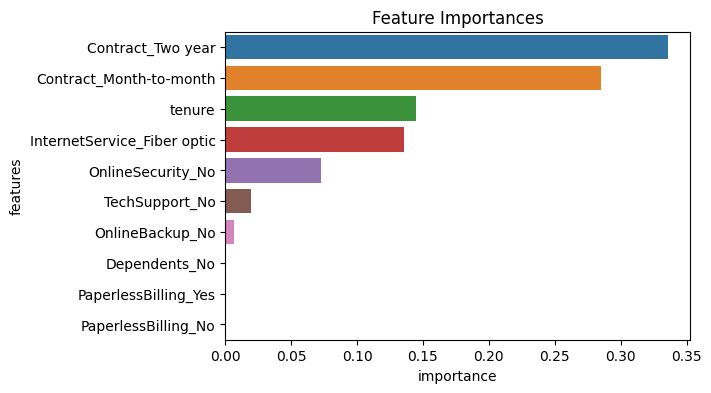

In [190]:
plt.figure(figsize=(6,4))
sns.barplot(df_importances.head(10), y='features', x= 'importance')
plt.title('Feature Importances')
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Untuk model **AdaBoost** : feature yang paling penting adalah `Contract_Two year`, `Contract_Month-to-month`, `tenure`, `InternetService_Fiber optic` dan `OnlineSecurity_No`.
- Feature yang dianggap kurang penting adalah `TechSupport_No` dan `OnlineBackup_No`.
- Untuk feature lainnya dianggap tidak penting.

## **6.3** ***Confusion Matrix***

In [176]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76       713
           1       0.47      0.90      0.62       258

    accuracy                           0.70       971
   macro avg       0.71      0.77      0.69       971
weighted avg       0.82      0.70      0.72       971



Berdasarkan informasi di atas, dapat diketahui bahwa :
- Precision = 47%, yang artinya dari seluruh pelanggan yang diprediksi *churn*, hanya 47% yang benar.
- Recall = 90%, yang artinya dari seluruh pelanggan yang aktualnya *churn*, model dapat memprediksi hasil dengan benar sebesar 90%.
- Accuracy = 70%, yang artinya model dapat menangkap prediksi yang sesuai dengan aktualnya sebesar 70%.

Selanjutnya, penjelasan terkait dengan confusion matrix akan digambarkan dengan heatmap.

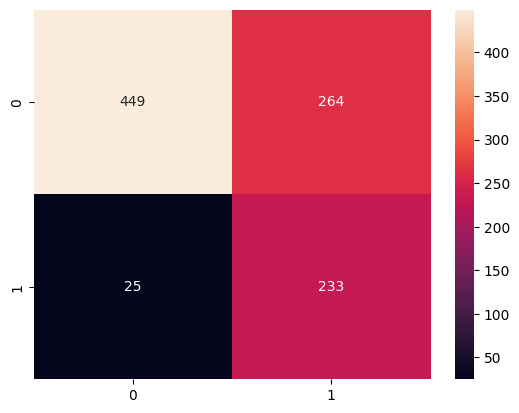

In [177]:
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='g')
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa :
- Pemodelan berdasarkan model AdaBoost dengan metric f2_score.
- Jumlah pelanggan yang diprediksi tidak akan *churn* berjumlah 449 + 25 = 474 pelanggan.
- Jumlah pelanggan yang diprediksi akan *churn* berjumlah 264 + 233 = 497 pelanggan.
- Jumlah pelanggan yang aktualnya tidak *churn* dan diprediksi sebagai tidak *churn* (**True Negative**) berjumlah 449 pelanggan.
- Jumlah pelanggan yang aktualnya tidak *churn* dan diprediksi sebagai *churn* (**False Positive**) berjumlah 264 pelanggan.
- Jumlah pelanggan yang aktualnya *churn* dan diprediksi sebagai tidak *churn* (**False Negative**) berjumlah 25 pelanggan.
- Jumlah pelanggan yang aktualnya *churn* dan diprediksi sebagai *churn* (**True Positive**) berjumlah 233 pelanggan.

## **6.4** ***Cost Evaluation***

Berdasarkan asumsi perkiraan biaya yang disampaikan pada *Business Understanding*, biaya untuk C*ustomer Retention Cost* sebesar $63 dan *Customer Acquisition Cost* sebesar $315 perpelanggan. Evaluasi biaya akan dibagi menjadi dua, yaitu estimasi biaya **tanpa machine learning** dan estimasi biaya **menggunakan machine learning**.


### **6.4.1** ***Cost Evaluation without Machine Learning***

Berdasarkan asumsi biaya yang sudah dijelaskan, maka diasumsikan dampak biaya sebagai berikut :
- Biaya retensi perpelanggan : $63
- Biaya kehilangan pelanggan : $315

Pada saat tidak menggunakan *machine learning*, maka tidak dapat memprediksi pelanggan yang akan *churn* atau tidak *churn*. Dampaknya adalah pemberian retensi kepada seluruh pelanggan. 
- Pelanggan yang diberi program retensi : 971 pelanggan
- Pelanggan yang aktualnya *churn* : 258 pelanggan

Estimasi biaya :
- (971 pelanggan * $63) + (258 pelanggan * $315) = $61173 + $81270 = $142443

Maka, biaya yang harus dikeluarkan berjumlah **$142443** untuk 971 pelanggan.

### **6.4.2** ***Cost Evaluation with Machine Learning***

Pada saat menggunakan *machine learning*, program retensi hanya ditawarkan pada pelanggan yang diprediksi churn.
- Pelanggan yang diberikan program retensi : 497 pelanggan
- Pelanggan yang aktualnya churn : 258 pelanggan

Estimasi Biaya :
- (497 pelanggan * $63) + (258 pelanggan * $315) = $31311 + $81270 = $112581

Maka, biaya yang harus dikeluarkan berjumlah **$112581** untuk 971 pelanggan.

### **6.4.3 Perbandingan** ***Cost Evaluation without Machine Learning & with Machine Learning***

Berdasarkan perhitungan biaya estimasi dari tanpa menggunakan machine learning dan dengan machine learning, maka didapatkan informasi sebagai berikut :
- Estimasi biaya tanpa machine learning : $142443
- Estimasi biaya dengan machine learning : $112581

Penurunan potensi kerugian : $142443 - $112581 = $29862

% Penurunan : ($29862 / $142443) * 100% = 20.96% = 21%

Berdasarkan model yang dibuat menggunakan machine learning, model dapat **menurunkan kerugian hingga 21%**.

<hr>

# **7.** ***Conclusion & Recommendation***

## **7.1** ***Conclusion***

Berdasarkan hasil pemodelan :
- Metric utama yang digunakan adalah f2_score, karena pada kasus ini recall dianggap dua kali lebih penting dibanding precision.
- Berdasarkan hasil *Model Benchmark* dan *Hyperparameter Tuning* model terbaik pada kasus ini adalah *AdaBoost*. Parameter terbaik pada model ini, yaitu :
    - `scaler`: None,
    - `resampler`: RandomUnderSampler(random_state=0),
    - `n_estimators`: 171,
    - `learning_rate`: 0.03,
    - `algorithm`: 'SAMME'
- Berdasarkan pemodelan *Hyperparameter Tuning AdaBoost* nilai f2_score pada test set adalah **76%**.
- Berdasarkan pemodelan *AdaBoost* fitur atau kolom yang paling penting adalah `Contract_Two year`, `Contract_Month-to-month`, `tenure`, `InternetService_Fiber optic` dan `OnlineSecurity_No`, sedangkan kolom lainnya dianggap tidak terlalu penting.
- Berdasarkan hasil *classification report*, pemodelan menggunakan model *Adaboost* dengan metric f2_score :
    - *Score Precision* : 47%
    - *Score Recall* : 90%
    - *Score Accuracy* : 70%

Berdasarkan asumsi perhitungan biaya :
- Tanpa Menggunakan *Machine Learning* : Biaya yang dikeluarkan tanpa menerapkan *Machine Learning* adalah **$142443** untuk 971 pelanggan. 
- Menggunakan *Machine Learning* : Biaya yang dikeluarkan dengan menerapkan *Machine Learning* adalah **$112581** untuk 971 pelanggan.
- Berdasarkan perhitungan tersebut, maka perusahaan dapat menghemat biaya dengan menerapkan model *Machine Learning* sebesar **$29862** atau **21%**.


## **7.2** ***Model Limitation***

Pada model ini, terdapat batasan yang harus diperhatikan. Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini. Data-data yang berlaku pada model ini, yaitu :
- `Dependents` : 'Yes' atau 'No'
- `tenure` : 0 sampai dengan 72
- `OnlineSecurity` : 'Yes', 'No' atau 'No internet service'
- `OnlineBackup` : 'Yes', 'No' atau 'No internet service'
- `InternetService` : 'DSL', 'Fiber optic' atau 'No'
- `DeviceProtection` : 'Yes', 'No' atau 'No internet service'
- `TechSupport` : 'Yes', 'No' atau 'No internet service'
- `Contract` : 'Month-to-month', 'One year' atau 'Two year'
- `PaperlessBilling` : 'Yes' atau 'No'
- `MonthlyCharges` : 18.8 sampai dengan 118.65

Apabila dilakukan hasil prediksi dengan data selain data yang disebutkan, maka hasil prediksi tersebut tidak valid.

## **7.3** ***Recommendation***

Berdasarkan pemodelan yang dilakukan :
- Perusahaan dapat menambahkan fitur atau kolom baru yang dapat memberikan informasi lebih banyak, seperti fitur kepuasan pelanggan saat menggunakan layanan yang ditawarkan perusahaan.
- Menambahkan fitur baru, seperti paket layanan yang diambil oleh pelanggan, jumlah biaya yang ditanggung berdasarkan paket layanan dan jumlah paket yang diambil perpelanggan.
- Menambahkan data pelanggan yang melakukan churn, karena pada dataset jumlah pelanggan churn tidak sebanding dengan data jumlah pelanggan yang tidak churn. Hal ini diperuntukan agar performa model yang akan dijalankan bisa lebih baik.
- Menganalisis secara lanjut untuk data-data yang diprediksi salah atau tidak sesuai dengan aktualnya, untuk mengetahui karakteristik dari data-data yang salah.
- Mencoba model algoritma lainnya yang tidak dipakai pada tahapan pemodelan ini, karena pada pemodelan ini model yang digunakan berjumlah tujuh model (Logistic Regression, KNeighbors, DecisionTree, RandomForest, AdaBoost, GradientBoosting dan XGB).


Berdasarkan analisis yang dilakukan :
- Perusahaan dapat memberikan perhatian lebih kepada pelanggan yang akan melakukan churn dengan memberikan layanan paket yang membuat pelanggan tertarik untuk berlangganan kembali berdasarkan karakteristik pelanggannya.
- Membuat paket langganan dengan `tenure` yang cukup lama, dengan cara memberikan layanan yang memberikan potongan harga apabila mengambil paket `tenure` yang cukup lama.
- Memberikan program *VIP* kepada pelanggan yang memiliki `MonthlyCharges` cukup besar.
- Memberikan layanan yang baik kepada para pelanggan yang mengambil layanan `InternetService`, khususnya kepada pelanggan yang mengambil 'Fiber optic' sebagai pilihan `InternetService`nya.
- Memberikan paket layanan yang lebih baik pada fitur `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` dan `TechSupport` agar pelanggan tertarik untuk mengambil layanan tersebut.
- Membuat `Contract` untuk jangka panjang yang lebih menarik, perusahaan dapat memberikan hadiah eksklusif tergantung `Contract` yang diambil oleh pelanggan.

<hr>

# **8.** ***Save Final Model***

In [194]:
final_model.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', None),
                ('resampler', RandomUnderSampler(random_state=0)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.03,
                                    n_estimators=171, random_state=0))])

In [195]:
# menyimpan model
pickle.dump(final_model, open('final_model_telco_churn.sav', 'wb'))